### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

#Clustering
import scipy.cluster.hierarchy as shc # for dendrogram
from sklearn.cluster import AgglomerativeClustering # for finding optimal number of clusters using agglomerative clustering
from sklearn.cluster import KMeans # for non-hierarchical clustering K-Means 
from sklearn.tree import DecisionTreeClassifier # For Decision Tree
from sklearn.ensemble import RandomForestClassifier # For Random Forest
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score # For checking score of prediction
from sklearn.metrics import roc_auc_score,roc_curve # For ROC Score


##  Problem 1 : Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage. 

### Problem 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

### Loading the Data

In [2]:
df = pd.read_csv('bank_marketing_part1_Data.csv')

**Data Dictionary For Market Segmentation :**
1. spending: Amount spent by the customer per month (in 1000s)
2. advance_payments: Amount paid by the customer in advance by cash (in 100s)
3. probability_of_full_payment: Probability of payment done in full by the customer to the bank
4. current_balance: Balance amount left in the account to make purchases (in 1000s)
5. credit_limit: Limit of the amount in credit card (10000s)
6. min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
7. max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

### First 5 Observations

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


### Last 5 Observations

In [4]:
df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


###  Data Descriptive Statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


**Interpretations :**
- We can note that there are all float values present in the dataset.
- There are total 210 observations present in the dataset.
- There were total 7 no. of columns present in it.

In [6]:
df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [7]:
df.shape

(210, 7)

The dimensions of the dataset was 210 * 7 meaning that there are 210 entries in the row and 7 columns provided in the dataset.

###  Checking For Null Values

In [8]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

**Interpretations :**

Hence, it cross confirms that no null values were present in the dataset.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


**Interpretations :**
- We inferred that mean and median values for all the columns were very close to each other indicating that there were very less skewness between them. 
- But in order for proper execution of clustering technique, scaling will be done in order to standardize the values which will eventually help in clustering.

###  5 Point Summary

In [10]:
behaviour = [df.quantile(0), 
            df.quantile(0.25), 
            df.quantile(0.50), 
            df.quantile(0.75),  
            df.quantile(1)]
print ('Minimum:',behaviour[0],'\n25% or Q1:' ,behaviour[1],'\n50% or Q2 or Median:', behaviour[2],'\n75% or Q3:',behaviour[3],'\nMaximum:',behaviour[4])

Minimum: spending                        10.5900
advance_payments                12.4100
probability_of_full_payment      0.8081
current_balance                  4.8990
credit_limit                     2.6300
min_payment_amt                  0.7651
max_spent_in_single_shopping     4.5190
Name: 0.0, dtype: float64 
25% or Q1: spending                        12.27000
advance_payments                13.45000
probability_of_full_payment      0.85690
current_balance                  5.26225
credit_limit                     2.94400
min_payment_amt                  2.56150
max_spent_in_single_shopping     5.04500
Name: 0.25, dtype: float64 
50% or Q2 or Median: spending                        14.35500
advance_payments                14.32000
probability_of_full_payment      0.87345
current_balance                  5.52350
credit_limit                     3.23700
min_payment_amt                  3.59900
max_spent_in_single_shopping     5.22300
Name: 0.5, dtype: float64 
75% or Q3: spending    

### IQR

In [11]:
df_iqr = Series.to_frame(df.quantile(0.75) - df.quantile(0.25))
df_iqr

,0
spending,5.035000
advance_payments,2.265000
probability_of_full_payment,0.030875
current_balance,0.717500
credit_limit,0.617750
min_payment_amt,2.207250
max_spent_in_single_shopping,0.832000


### Skewness

In [12]:
df.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

**Interpretations :**
- We inferred that current balance and maximum spent in single shopping had maximum skewness among all.
- Among everyone, only probability of full payment had a value of -0.537 which indicated that it is negatively(left) skewed.
- Except Probability of full payment, rest all are positively (right) skewed.

## EDA

### Univariate

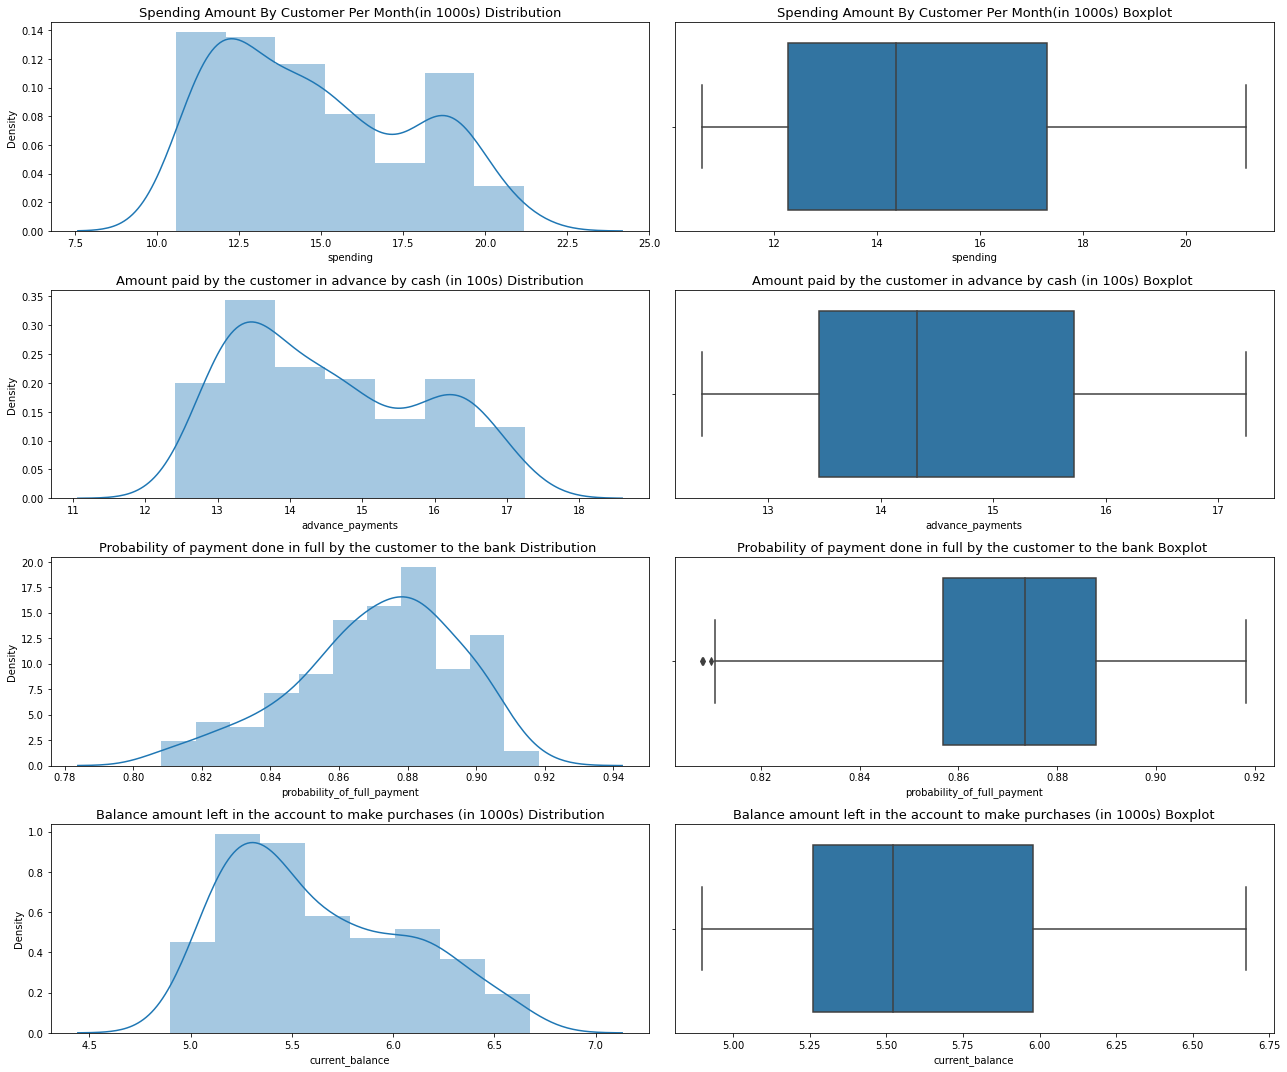

In [13]:
plt.figure(figsize =(18,15))

#Spending
plt.subplot(4,2,1)
a = sns.distplot(df['spending'])
a.set_title('Spending Amount By Customer Per Month(in 1000s) Distribution',fontsize = 13)

plt.subplot(4,2,2)
a = sns.boxplot(df['spending'])
a.set_title('Spending Amount By Customer Per Month(in 1000s) Boxplot',fontsize = 13)

#For Advance Payments
plt.subplot(4,2,3)
b = sns.distplot(df['advance_payments'])
b.set_title('Amount paid by the customer in advance by cash (in 100s) Distribution', fontsize=13)

plt.subplot(4,2,4)
b = sns.boxplot(df['advance_payments'])
b.set_title('Amount paid by the customer in advance by cash (in 100s) Boxplot ', fontsize = 13)

#Probability of Full Payment
plt.subplot(4,2,5)
c = sns.distplot(df['probability_of_full_payment'])
c.set_title('Probability of payment done in full by the customer to the bank Distribution ', fontsize = 13)

plt.subplot(4,2,6)
c = sns.boxplot(df['probability_of_full_payment'])
c.set_title('Probability of payment done in full by the customer to the bank Boxplot ', fontsize = 13)

#Current Balance
plt.subplot(4,2,7)
d = sns.distplot(df['current_balance'])
d.set_title('Balance amount left in the account to make purchases (in 1000s) Distribution' , fontsize = 13)

plt.subplot(4,2,8)
d = sns.boxplot(df['current_balance'])
d.set_title('Balance amount left in the account to make purchases (in 1000s) Boxplot' , fontsize = 13)


plt.tight_layout()
plt.show()

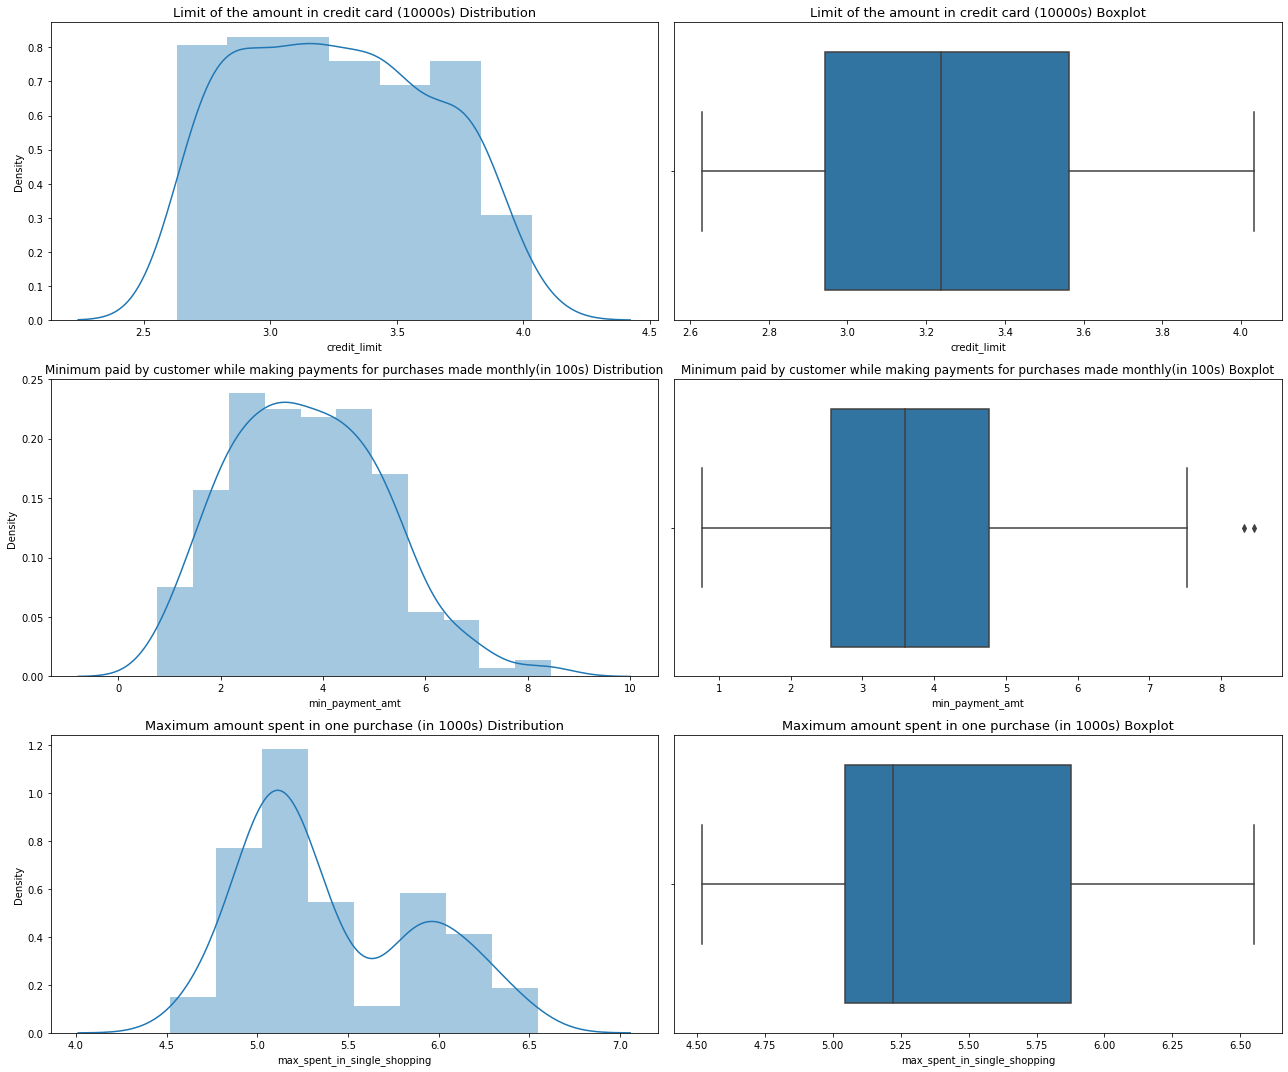

In [14]:
plt.figure(figsize =(18,15))

#Credit Limit
plt.subplot(3,2,1)
e = sns.distplot(df['credit_limit'])
e.set_title('Limit of the amount in credit card (10000s) Distribution',fontsize = 13)

plt.subplot(3,2,2)
e = sns.boxplot(df['credit_limit'])
e.set_title('Limit of the amount in credit card (10000s) Boxplot', fontsize = 13)

#Minimum Payment Amount
plt.subplot(3,2,3)
f = sns.distplot(df['min_payment_amt'])
f.set_title('Minimum paid by customer while making payments for purchases made monthly(in 100s) Distribution',fontsize = 12)

plt.subplot(3,2,4)
f = sns.boxplot(df['min_payment_amt'])
f.set_title('Minimum paid by customer while making payments for purchases made monthly(in 100s) Boxplot',fontsize = 12)

#Maximum Spent In Single Shopping
plt.subplot(3,2,5)
f = sns.distplot(df['max_spent_in_single_shopping'])
f.set_title('Maximum amount spent in one purchase (in 1000s) Distribution',fontsize = 13)

plt.subplot(3,2,6)
f = sns.boxplot(df['max_spent_in_single_shopping'])
f.set_title('Maximum amount spent in one purchase (in 1000s) Boxplot',fontsize = 13)


plt.tight_layout()
plt.show()

**Interpretations :**
- After analysis all the distribution plots we inferred that, current balance and maximum spent in single shopping had maximum skewness among all.
- Except Probability of full payment, rest all are positively (right) skewed, because it's end tail was extending towards the left side which indicates the negative(left) skewness. 

### Bivariate Analysis

In [15]:
corr = df.corr(method='pearson')
corr.round(3)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000,0.994,0.608,0.950,0.971,-0.230,0.864
advance_payments,0.994,1.000,0.529,0.972,0.945,-0.217,0.891
probability_of_full_payment,0.608,0.529,1.000,0.368,0.762,-0.331,0.227
current_balance,0.950,0.972,0.368,1.000,0.860,-0.172,0.933
credit_limit,0.971,0.945,0.762,0.860,1.000,-0.258,0.749
min_payment_amt,-0.230,-0.217,-0.331,-0.172,-0.258,1.000,-0.011
max_spent_in_single_shopping,0.864,0.891,0.227,0.933,0.749,-0.011,1.000


- It shows the Correlation Matrix of the original dataset using Pearson method.
- After this, a heatmap was created wrt to correlation matrix for visualization.

### Heatmap

A __correlation heatmap__ is a rectangular representation of data and it repeats the same data description twice because the categories are repeated on both axis for computing analysis. Hence, the same result is obtained twice. A correlation heatmap that presents data only once without repetition that is categories are correlated only once is known as a __triangle correlation heatmap__ . <Br> Since data is symmetric across the diagonal from left-top to right bottom the idea of obtaining a triangle correlation heatmap is to remove data above it so that it is depicted only once. The elements on the diagonal are the parts where categories of the same type correlate.

**Interpretations :**
- It showed that almost 99% of the customers did advance payments while spending money. While on the other hand, there is minimum correlation that is of -33% between minimum payment amount and probability of full payment which clearly indicated that, the customers who paid minimal amount for making purchases would unlikely had very less amount of probabilty of making payment in full as these customers preferred to pay minimum amount while conducting purchases.
- Adding on, it shows that there was 53% between probability of full payment and advance payments which means that mostly 50% of the customers are likely to pay the payments full in advance.
- Furthermore, we also get the insight that the correlation between spending and current balance is 95% which clearly indicated that the balance amount left in the customer's bank account per month was being used by him/her while spending at different places per  month.

### Multi-Variate Analysis

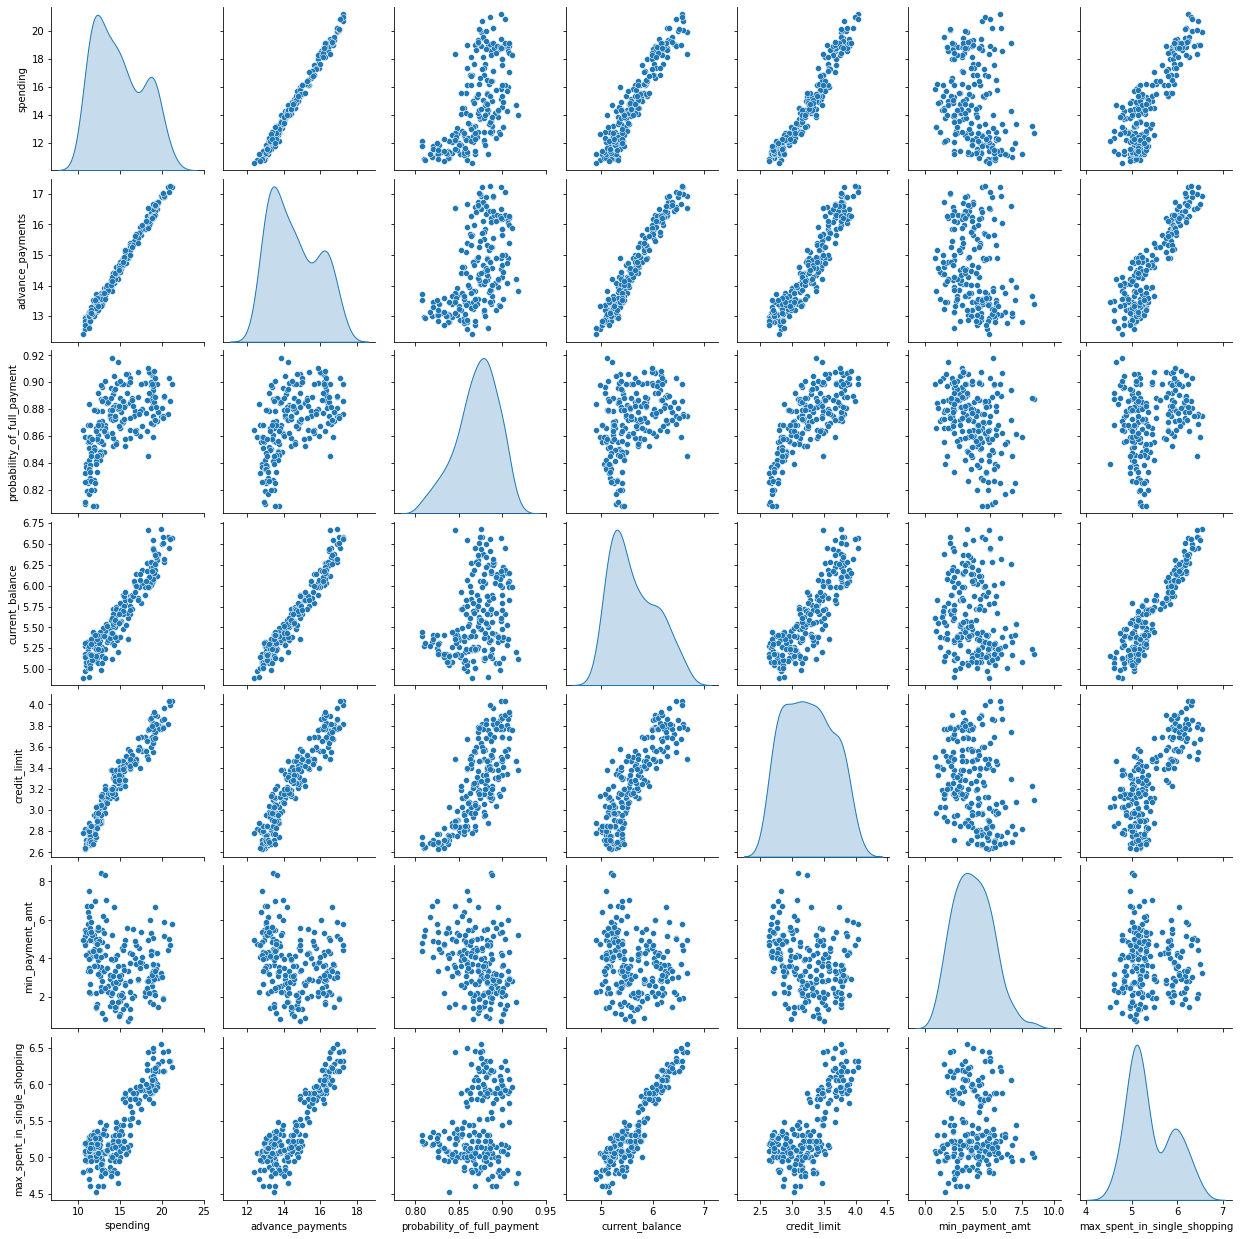

In [17]:
sns.pairplot(df,diag_kind='kde'); vccv

### Problem 1.2  Do you think scaling is necessary for clustering in this case? Justify

Yes, scaling is required in this data set as all features have different weights and to ensure that none of the feature is identified as important only because of the weight, scaling is mandatory for this data set.

### Scaling

In [18]:
from scipy.stats import zscore

#apply the scaler to the data:
df_scaled=  df.apply(zscore)
df_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


### Problem 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

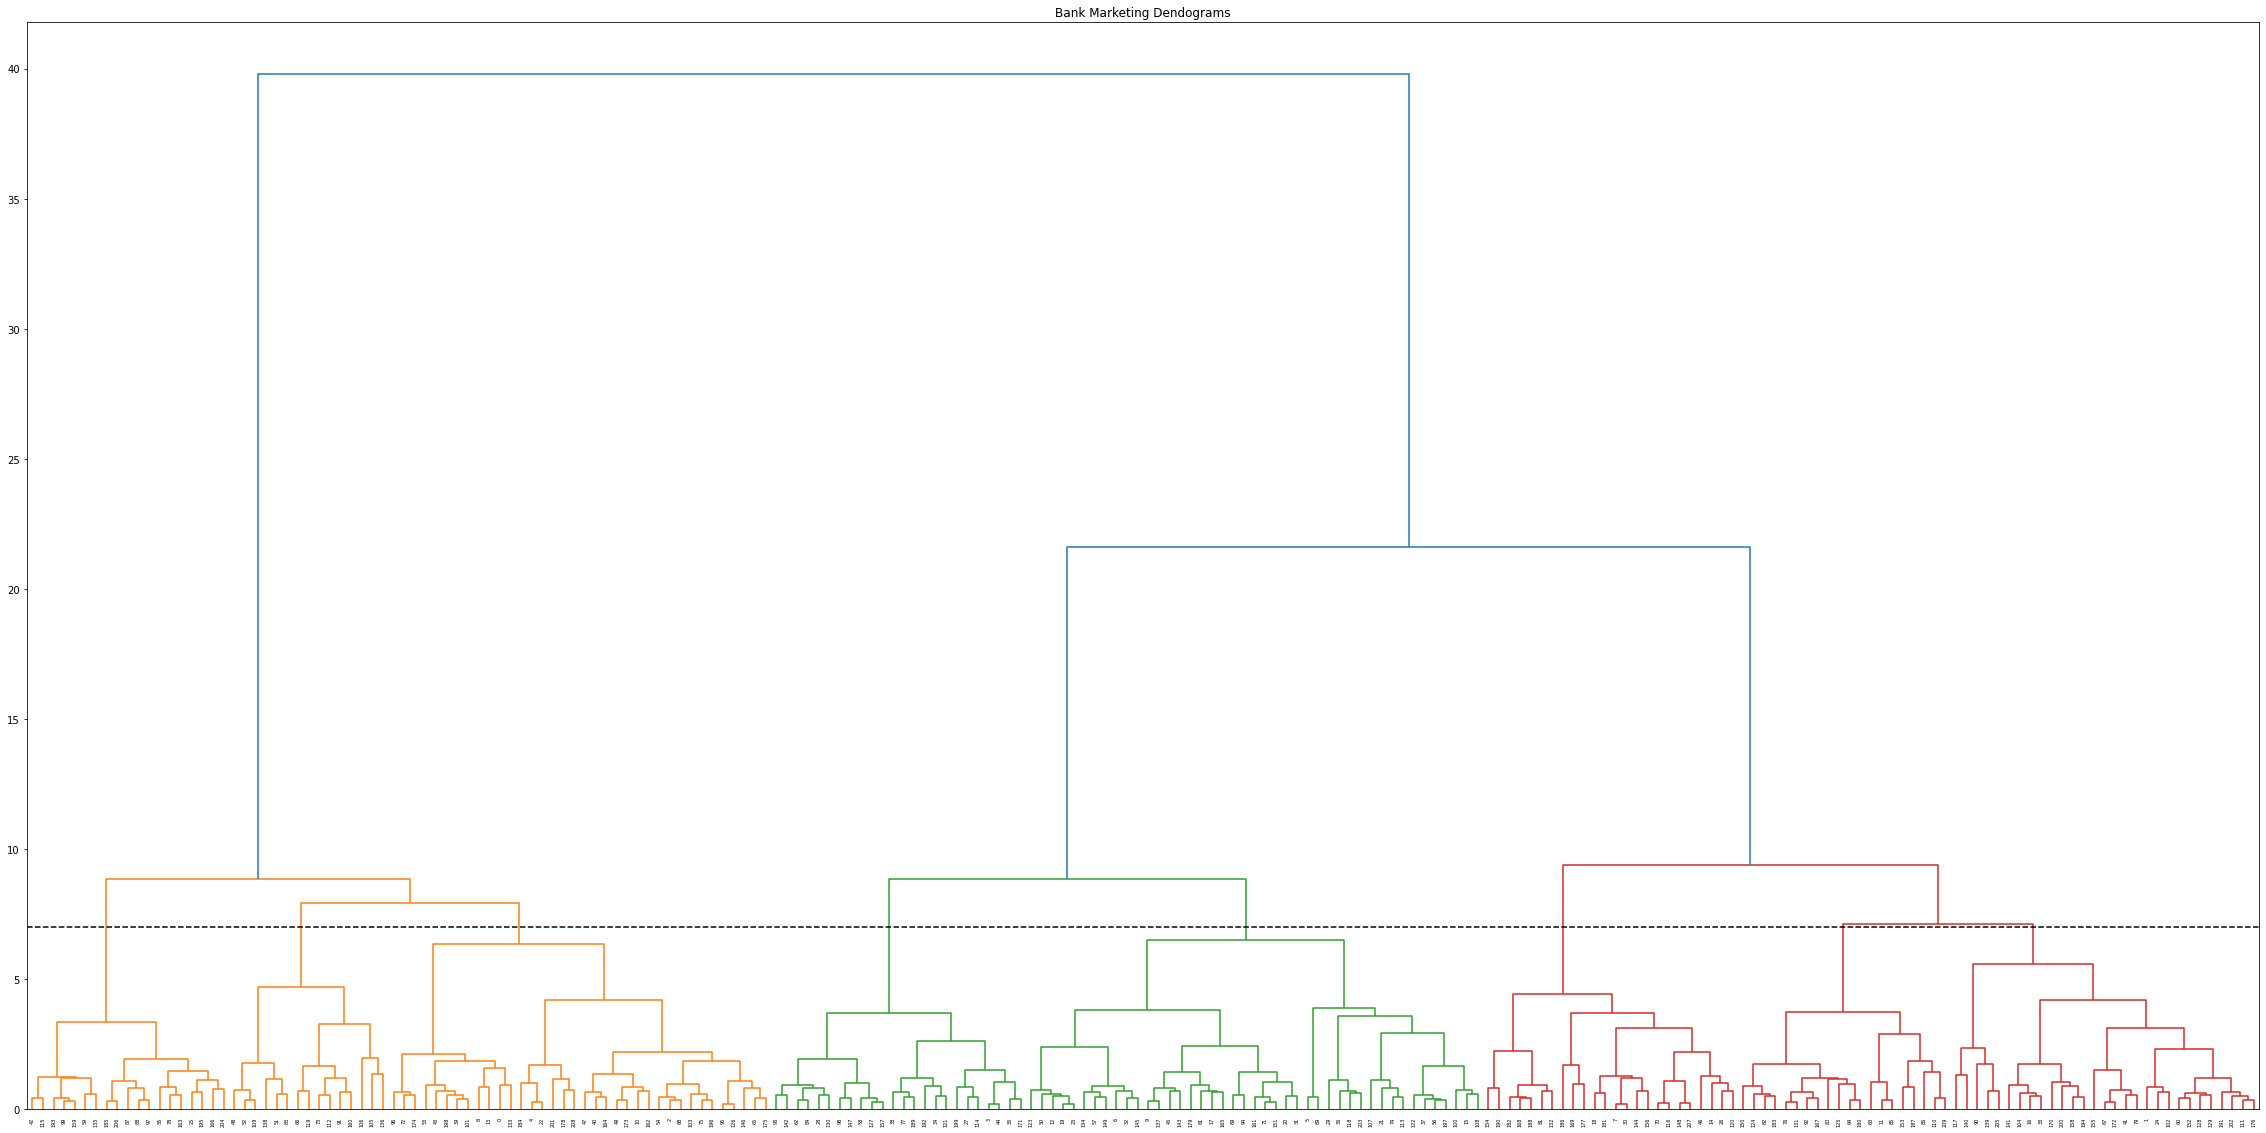

In [19]:
# Using Ward Method
plt.figure(figsize=(40, 20))
plt.title("Bank Marketing Dendograms")
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'),color_threshold=10)
plt.axhline(7, color='black', linestyle='--')
plt.show()

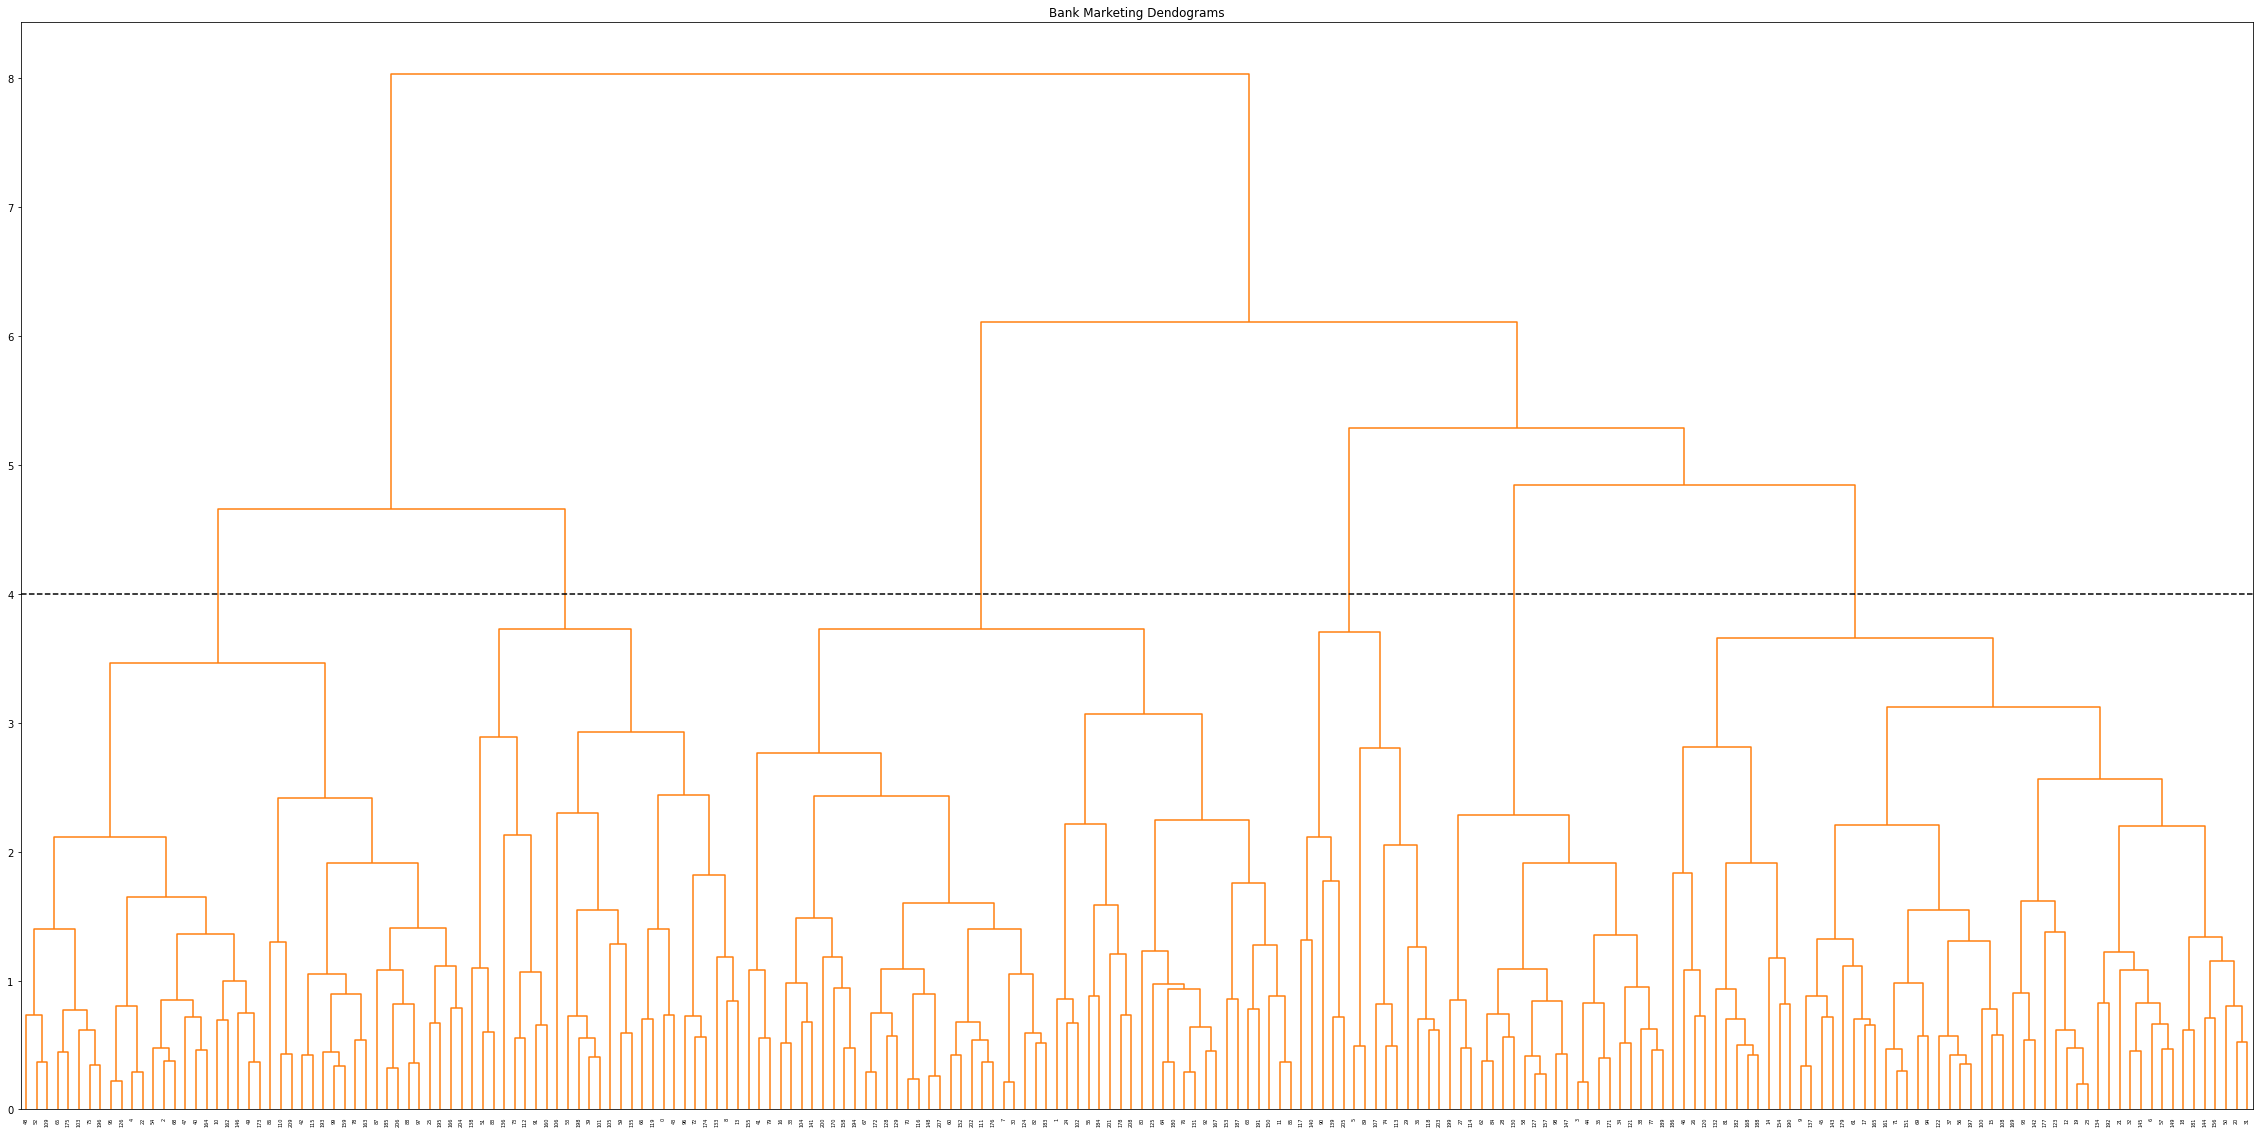

In [20]:
# Using Complete Method
plt.figure(figsize=(40, 20))
plt.title("Bank Marketing Dendograms")
dend = shc.dendrogram(shc.linkage(df_scaled, method='complete'),p=50,color_threshold=10)
plt.axhline(4, color='black',linestyle='--')
plt.show()

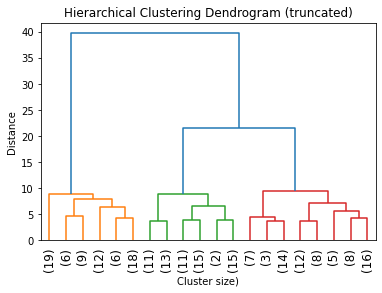

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
Z_Final = linkage(df_scaled, 'ward', metric='euclidean')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster size)')
plt.ylabel('Distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=12,
    color_threshold=10
    
)
plt.show()

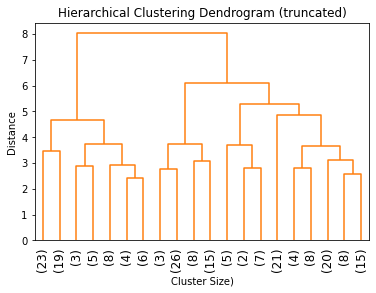

In [22]:
Z_Final = linkage(df_scaled, 'complete', metric='euclidean')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster Size)')
plt.ylabel('Distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=12,
    color_threshold=10
    
)
plt.show()

#### Agglomerative Clustering

In [23]:
# from WARD method, it is observed that 4 can be the correct number of clusters
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clusters_1=cluster.fit_predict(df_scaled)
clusters_1

array([1, 2, 1, 0, 1, 0, 0, 3, 1, 0, 1, 2, 0, 1, 3, 0, 2, 0, 3, 0, 0, 0,
       1, 0, 2, 1, 3, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 3, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 3, 2, 1, 0, 2, 2, 1,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 3, 2, 0, 1, 3, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       3, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 3, 0, 1, 0, 3, 0, 2, 0, 2, 2,
       3, 2, 3, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 3, 3, 2, 0, 2, 1, 1, 1,
       2, 3, 1, 0, 2, 3, 3, 2, 1, 1, 3, 2, 3, 0, 3, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 3, 1, 2], dtype=int64)

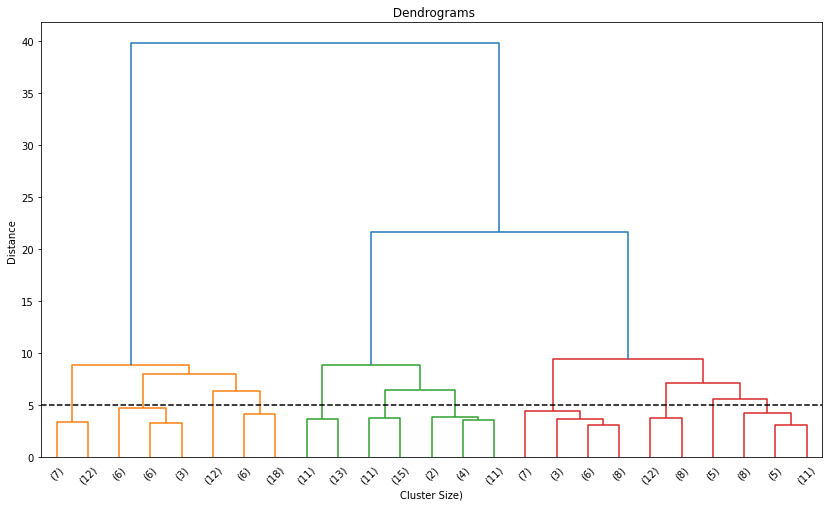

In [24]:
plt.figure(figsize=(14, 8))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster Size)')
plt.ylabel('Distance')
plt.title(" Dendrograms")
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'),p=25,truncate_mode='lastp',color_threshold=10)
plt.axhline(5, color='black', linestyle='--') # axline is used to give the cutoff in the dendrogram
plt.show()

#### Fcluster

In [25]:
clusters_2 = shc.fcluster(shc.linkage(df_scaled, method='ward'), 4, criterion='maxclust')
clusters_2

array([1, 4, 1, 2, 1, 2, 2, 3, 1, 2, 1, 4, 2, 1, 3, 2, 4, 2, 3, 2, 2, 2,
       1, 2, 4, 1, 3, 2, 2, 2, 3, 2, 2, 4, 2, 2, 2, 2, 2, 1, 1, 4, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 4, 2, 2, 4, 4, 1,
       1, 4, 1, 2, 3, 2, 1, 1, 2, 1, 4, 2, 1, 4, 4, 3, 4, 1, 2, 4, 4, 1,
       1, 2, 4, 1, 4, 2, 2, 1, 1, 1, 2, 1, 2, 1, 4, 1, 4, 1, 1, 2, 2, 1,
       4, 4, 1, 2, 2, 1, 3, 4, 2, 1, 3, 2, 2, 2, 4, 4, 1, 2, 4, 4, 2, 4,
       3, 1, 2, 1, 1, 2, 1, 4, 4, 4, 2, 2, 3, 2, 1, 2, 3, 2, 4, 2, 4, 4,
       3, 4, 3, 2, 4, 1, 1, 2, 1, 1, 1, 2, 1, 4, 3, 3, 4, 2, 4, 1, 1, 1,
       4, 3, 1, 2, 4, 3, 3, 4, 1, 1, 3, 4, 3, 2, 3, 4, 2, 1, 4, 1, 1, 2,
       1, 2, 4, 1, 4, 2, 1, 4, 1, 3, 1, 4], dtype=int32)

### Problem 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve. Explain the results properly. Interpret and write inferences on the finalized clusters.

#### K-Means

In [26]:
wss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df_scaled)
    # inertia method returns wss for that model
    wss.append(kmeans.inertia_)

In [27]:
for i in range(1,11):
    print('The WSS value for',i,'clusters is',wss[i-2])

The WSS value for 1 clusters is 206.8218298219254
The WSS value for 2 clusters is 1469.9999999999995
The WSS value for 3 clusters is 659.1717544870411
The WSS value for 4 clusters is 430.65897315130064
The WSS value for 5 clusters is 371.5811909715524
The WSS value for 6 clusters is 326.2289168297266
The WSS value for 7 clusters is 289.8117122400139
The WSS value for 8 clusters is 262.96881100076376
The WSS value for 9 clusters is 241.23160096215614
The WSS value for 10 clusters is 221.3663801086848


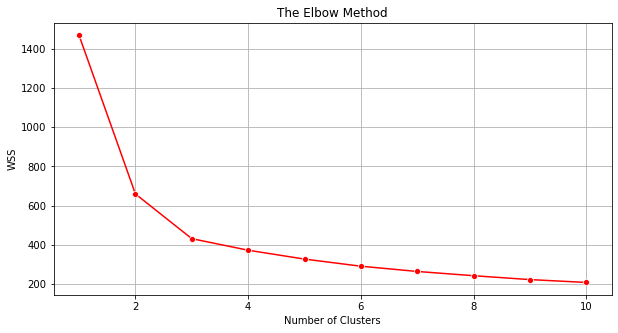

In [28]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.grid()
plt.show()

$ Interpretations : $
- K-means clustering technique was used along with elbow curve to define the optimum clusters for this data set.
- In the Elbow Curve, we saw that there was a steep slope at 2 but we also noticed that after 3 there was a significant decline in the value of WSS which indicated that 3 was the elbow point/turning point in the curve.
- Thus, in other words, the optimal number of clusters are 3 as per the Elbow Curve.

In [29]:
# In this, we apply K means method where we tell no. of clusters and random state is basically fixing the starting point from where we want to start.
# Then we picked up the scaled data and then use the k means we used the above code and get the output

k_means = KMeans(n_clusters = 4,random_state=42)
k_means.fit(df_scaled)
labels = k_means.labels_
labels

array([0, 3, 0, 1, 0, 1, 1, 3, 0, 1, 0, 2, 1, 0, 3, 1, 3, 1, 1, 1, 1, 1,
       0, 1, 3, 2, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 3, 2, 0,
       1, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 3, 1, 1, 2, 3, 0,
       0, 3, 0, 3, 3, 1, 0, 0, 1, 0, 3, 1, 2, 3, 3, 3, 3, 0, 1, 2, 2, 2,
       2, 1, 3, 0, 3, 1, 1, 0, 0, 2, 1, 0, 3, 0, 2, 0, 3, 0, 0, 1, 1, 0,
       2, 3, 0, 1, 1, 2, 3, 2, 1, 0, 3, 1, 1, 1, 3, 3, 0, 1, 3, 3, 1, 3,
       3, 0, 1, 0, 0, 1, 2, 3, 2, 3, 1, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 2,
       1, 3, 3, 1, 3, 0, 0, 1, 0, 2, 0, 1, 2, 3, 3, 1, 3, 1, 3, 0, 0, 0,
       3, 3, 2, 1, 3, 3, 3, 3, 2, 2, 3, 2, 3, 1, 3, 3, 1, 0, 3, 2, 0, 1,
       0, 1, 3, 2, 3, 1, 2, 3, 2, 3, 2, 2])

Let's check number of clusters = 3

In [30]:
k_means = KMeans(n_clusters = 3,random_state=42)
k_means.fit(df_scaled)
labels_3 = k_means.labels_
labels_3

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

### Problem 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

#### Agglomerative / Fcluster Profiling

In [31]:
df['cluster_1'] = clusters_1
df['cluster_2'] = clusters_2
df.head() 

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_1,cluster_2
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,4
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


In [32]:
df1 = df.drop(['cluster_2'],axis=1)
df_clust_1 = df1.groupby('cluster_1').mean()
cluster_1_freq = df['cluster_1'].value_counts().sort_index()
df_clust_1['cluster count'] = cluster_1_freq
df_clust_1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster count
cluster_1,,,,,,,,
0,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,14.884898,14.560816,0.882069,5.587837,3.317776,2.730247,5.180306,49
3,12.798750,13.565417,0.873312,5.254458,3.040000,2.371129,4.894000,24


In [33]:
df2 = df.drop(['cluster_1'],axis=1)
df_clust_2 = df2.groupby('cluster_2').mean()
cluster_2_freq = df['cluster_2'].value_counts().sort_index()
df_clust_2['cluster count'] = cluster_2_freq
df_clust_2

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster count
cluster_2,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,12.798750,13.565417,0.873312,5.254458,3.040000,2.371129,4.894000,24
4,14.884898,14.560816,0.882069,5.587837,3.317776,2.730247,5.180306,49


**Interpretations Of Agglomerative Clustering:**
- The total number of clusters derived from agglomerative/fcluster methods were 4.
- We inferred that, the cluster 1 & cluster 2(as per index) in __cluster_1__ had given highest ranking to all features except minimum payment amount as compared to others clusters. It means that the customers in these particular clusters tends to spend the most amount of money per month and giving advance payments in cash along with a highest probability value for doing full payment to bank and rest of the features also except for minimum payment amount made while making purchases. It was quite interesting to note that as highest values for making advance payments were already done in cash by these customers, the minimum amount paid is quite good as well. With a remarkable highest probability values of making full payments clearly shows that the always made there payments on time and can be considered as great customers.  
- While on the other hand, cluster 0(as per index) in __cluster_1__ had given best ranking to minimum payment amount as compared to the other clusters. Adding on , cluster 0 had lowest value in spending and at the same time , the customers in these cluster group gives highest ranking in minimum payment while making purchases. This shows the correlation between these two features in cluster 0(as per index).
- Moving on, when we looked at cluster 3(as per index) in __cluster_1__ , the cluster count(customer frequency) is lowest among the others which indicates how precisely the clustering is done in this cluster. From this cluster, we determined that maximum amount spend on one single purchase is lowest in this cluster as the customers in this cluster don't tend to spend excess amount of money as compared to other clusters.
- We noted that, the advance payments were made in cash and it was directly proporational to spending. Spending amount generarlly include payments made in cash and payment done via credit card and upi(indirectly credit card/netbanking).

#### K-Means Profiling

In [34]:
# Adding columns into the original dataset
df['kmeans_cluster_4']= labels
df['kmeans_cluster_3']= labels_3
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_1,cluster_2,kmeans_cluster_4,kmeans_cluster_3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,0,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,4,3,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,0,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,2,1,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,0,2


In [35]:
# For K-Means = 4
df_kmeans_4 = df.drop(['cluster_1','cluster_2','kmeans_cluster_3'],axis=1)
df_kclust_4 = df_kmeans_4.groupby('kmeans_cluster_4').mean()
cluster_4_freq = df['kmeans_cluster_3'].value_counts().sort_index()
df_kclust_4['cluster count'] = cluster_4_freq
df_kclust_4


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster count
kmeans_cluster_4,,,,,,,,
0,19.056275,16.433725,0.886394,6.260275,3.760961,3.479392,6.118980,71.0
1,11.852353,13.251029,0.847462,5.237221,2.843853,4.888074,5.118441,72.0
2,16.096667,15.186667,0.876503,5.829333,3.422333,3.979633,5.633200,67.0
3,14.053279,14.141967,0.881657,5.437820,3.220426,2.423200,5.025852,NaN


In [36]:
# For K-Means = 3
df_kmeans_3 = df.drop(['cluster_1','cluster_2','kmeans_cluster_4'],axis=1)
df_kclust_3 = df_kmeans_3.groupby('kmeans_cluster_3').mean()
cluster_3_freq = df['kmeans_cluster_3'].value_counts().sort_index()
df_kclust_3['cluster count'] = cluster_3_freq
df_kclust_3

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster count
kmeans_cluster_3,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,72
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67



From profiling both the clusters for no. of clusters = 3 & no. of clusters =4, we determined that , the final number of clusters for K-Means Method is 3.

**Interpretations For K-Means :**
- We inferred that cluster 2(as per index) in __kmeans_cluster_3__ had given the highest ranking among all features except fot minimum payment amount as compared to  other clusters.
- We can also state that cluster 1(as per index) in __kmeans_cluster_3__ had given the highest ranking in the minimum payment amount while making purchases and simultaneously the same cluster had the least ranking in the spending feature as compared with other clusters.
- We noticed that probability value of payment done in full was almost equal in cluster 0 & cluster 2(as per index) in __kmeans_cluster_3__ with cluster 2 having the upper hand while the remaining cluster that was cluster 1(as per index) had lowest value for probability of full payment.

**Recommendations For Promotional Strategies :**
- From Agglomerative Clustering , we determined that the final optimal number of clusters were equal to 4 while on the other hand, from K-Means Clustering the final optimal number of clusters were determined to be 3.
- From both the clustering we observed that the cluster having highest ranking in minimum payment amount while making purchases also had the lowest ranking in spending amount by the customer which means that the customers who paid minimal amount for making purchases would unlikely had very less amount of probabilty of making payment in full as these customers preferred to pay minimum amount while conducting purchases. So in this case, the recommendations were as follows:
    - Bank should develop and advertise cashback offers on variety of purchases but with a condition of slightly high amount of minimum payment for that product during purchases which will ultimately lead to increase in monthly spending by the customers as well as increasse in the minimum paid amount by customer which making purchases. 
- From Agglomrative clustering, we noted that at cluster 3(as per index) in __cluster_1__ , the cluster count(customer frequency) is lowest among the others which indicates how precisely the clustering is done in this cluster. From this cluster, we determined that maximum amount spend on one single purchase is lowest in this cluster as the customers in this cluster don't tend to spend excess amount of money as compared to other clusters. Recommendations for this were as follows:
    - Bank should promote offers such as easy to go with cashless payments(using credit cards, net-banking etc) are very much reliable nowadays. For example, when payment is done at petrol pump via credit card then credit points are added and these points are used for redeeming gift vouchers, cashback and various products. Thus by availing these banking services, customers will spend more using the bank services which will lead to increase in there credit limit increase which will directly result in increase in maximum spent on a single shopping.
- We noted that, the advance payments were made in cash and it was directly proportional to spending. Spending amount generally include payments made in cash and payment done via credit card and Upi(indirectly credit card/net banking). So, recommendations were as follows :
    - For marketing more promotional offers should be given to those customers who will avail this particular bank credit cards and Upi(technically linked with card or user bank account). This would made the customers automatically reaching the bank for opening account in that respective bank and for those who were already customers of that bank, then they would request the bank to issue credit card for them so that they could avail promotional offers while making purchases in their daily life.

After this, we added the optimum clusters derived from Hierarchical Clustering and KMeans clustering to the original data and export it to a '.csv' file.

In [37]:
df.drop(['cluster_1','cluster_2','kmeans_cluster_4','kmeans_cluster_3'],axis=1,inplace=True)

In [38]:
labels.shape

(210,)

In [39]:
df.shape

(210, 7)

In [40]:
df['Hierarchical Clustering Clusters'] = clusters_1
df['KMeans Clustering Clusters'] = labels_3
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Hierarchical Clustering Clusters,KMeans Clustering Clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,2


#### Exporting the clusters into csv file

In [41]:
df.to_csv('Clustering Project.csv')

## Problem  2: CART-RF

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART & RF and compare the models' performances in train and test sets.

### Problem 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [42]:
data = pd.read_csv('insurance_part2_data.csv')

**Data Dictionary :**

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration in days)
7. Destination of the tour (Destination)
8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
9. The commission received for tour insurance firm (Commission is in percentage of sales)
10. Age of insured (Age)

### First 5 Observations

In [43]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


### Last 5 Observations

In [44]:
data.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


### Data Descriptive Statistics

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


**Interpretations :**

- We inferred that there were three types of data types in this dataset which were integer, object and float.
- There were 2 columns with 'float' data type, 2 columns with 'integer' data type and 6 columns with 'object' data type.
- Many columns are of type object i.e. strings. These need to be converted to ordinal type.

In [46]:
data.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [47]:
data.shape

(3000, 10)

**Interpretations :**

- We noted that there were total 10 number of columns in this data set.
- We also noted that there were 3000 number of observations in the following dataset.

### Checking For Null Values

In [48]:
data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

**Drop the unnecessary columns - Agency_Code is not required in the modelling**

In [49]:
data_object = data.drop(['Agency_Code','Claimed'],axis=1)

In [50]:
# Description Of Data
data_object.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Interpretations :**
- We noticed that for all the numerical data , mean was greater than median which tells us that the distribution is positively skewed.

In [51]:
data_object.columns

Index(['Age', 'Type', 'Commision', 'Channel', 'Duration', 'Sales',
       'Product Name', 'Destination'],
      dtype='object')

#### Data Mining algorithms in Python can take only numerical / categorical colums. It cannot take string / obeject types. 


In [52]:
#The following code loops through each column and checks if the column type is object then converts those columns into categorical with each distinct value becoming a category or code.

for feature in data_object.columns: 
    if data_object[feature].dtype == 'object': 
        data_object[feature] = pd.Categorical(data_object[feature]).codes

In [53]:
data_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Type          3000 non-null   int8   
 2   Commision     3000 non-null   float64
 3   Channel       3000 non-null   int8   
 4   Duration      3000 non-null   int64  
 5   Sales         3000 non-null   float64
 6   Product Name  3000 non-null   int8   
 7   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(4)
memory usage: 105.6 KB


All object data types were being converted to ordinal types.

In [54]:
data_object['Claimed'] = data['Claimed']

In [55]:
data_object.head()

,Age,Type,Commision,Channel,Duration,Sales,Product Name,Destination,Claimed
0,48,0,0.70,1,7,2.51,2,0,No
1,36,1,0.00,1,34,20.00,2,0,No
2,39,1,5.94,1,3,9.90,2,1,No
3,36,1,0.00,1,4,26.00,1,0,No
4,33,0,6.30,1,53,18.00,0,0,No


### IQR

In [56]:
data_iqr = Series.to_frame(data_object.quantile(0.75) - data_object.quantile(0.25))
data_iqr

,0
Age,10.000
Type,1.000
Commision,17.235
Channel,0.000
Duration,52.000
Sales,49.000
Product Name,1.000
Destination,0.000


### Skewness

In [57]:
data_object.skew()

Age              1.149713
Type            -0.461352
Commision        3.148858
Channel         -7.892734
Duration        13.784681
Sales            2.381148
Product Name     0.432670
Destination      2.188556
dtype: float64

**Interpretations :**
- We observed that only 'Type' and 'Channel' had negative values which means that they were negatively(left) skewed.
- Among everyone, 'Duration' had the highest skewness while 'Channel' had the lowest skewness.
- Since each and every column has some skewness in it (left or right), it determines that all columns are not normally distributed.

### EDA

### Univariate Analysis

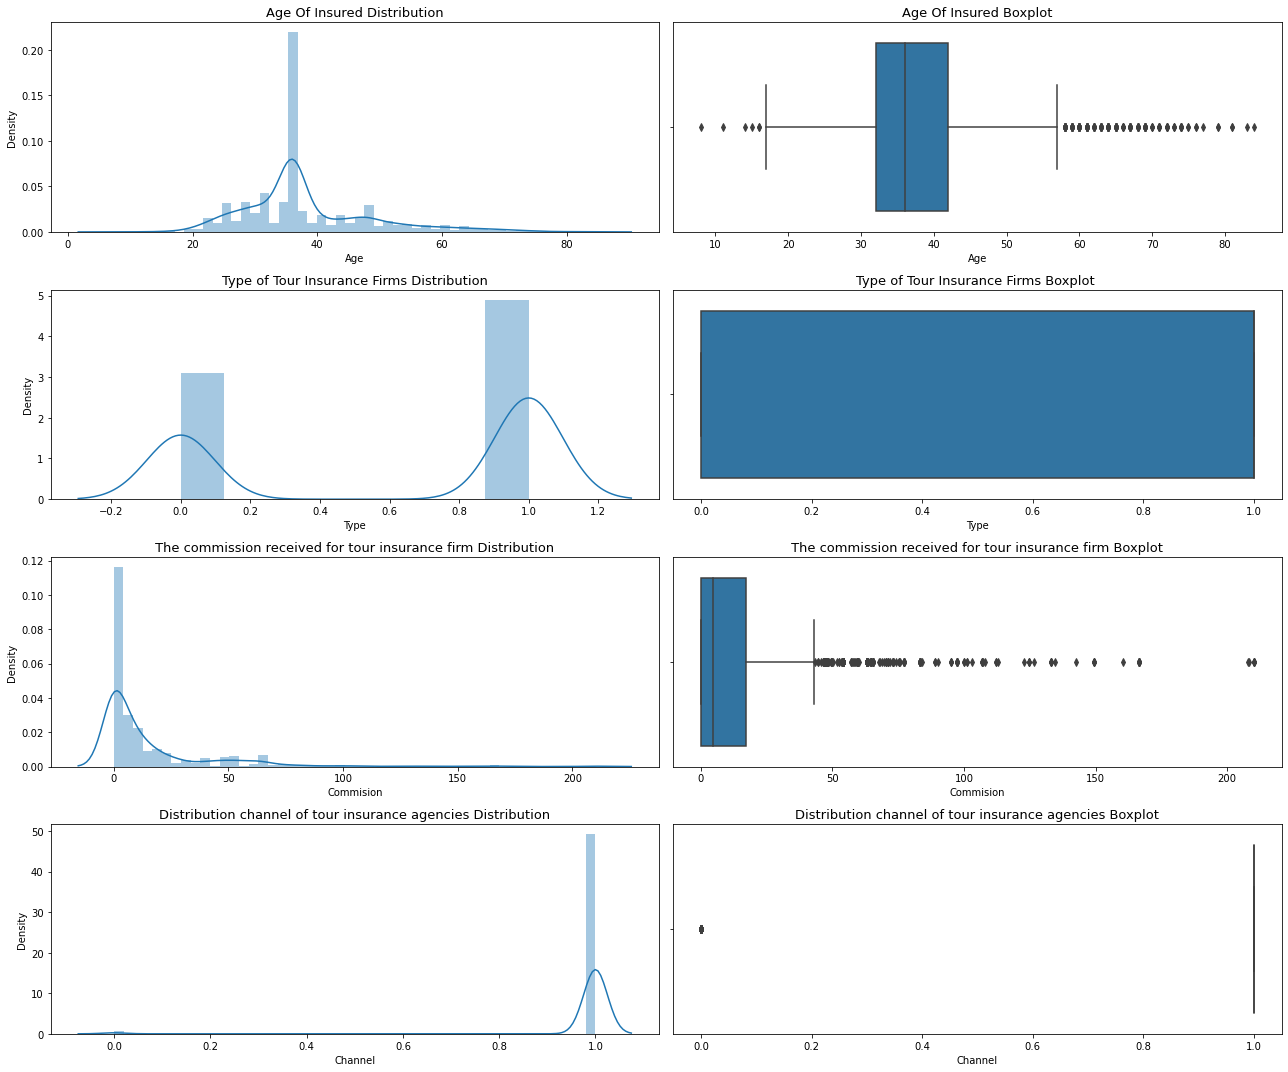

In [58]:
plt.figure(figsize =(18,15))

#Age
plt.subplot(4,2,1)
a = sns.distplot(data_object['Age'])
a.set_title('Age Of Insured Distribution',fontsize = 13)

plt.subplot(4,2,2)
a = sns.boxplot(data_object['Age'])
a.set_title('Age Of Insured Boxplot',fontsize = 13)

#Type
plt.subplot(4,2,3)
b = sns.distplot(data_object['Type'])
b.set_title('Type of Tour Insurance Firms Distribution', fontsize=13)

plt.subplot(4,2,4)
b = sns.boxplot(data_object['Type']) 
b.set_title('Type of Tour Insurance Firms Boxplot ', fontsize = 13)

#Commission
plt.subplot(4,2,5)
c = sns.distplot(data_object['Commision'])
c.set_title(' The commission received for tour insurance firm Distribution ', fontsize = 13)

plt.subplot(4,2,6)
c = sns.boxplot(data_object['Commision'])
c.set_title(' The commission received for tour insurance firm Boxplot ', fontsize = 13)

#Channel
plt.subplot(4,2,7)
d = sns.distplot(data_object['Channel'])
d.set_title('Distribution channel of tour insurance agencies Distribution' , fontsize = 13)

plt.subplot(4,2,8)
d = sns.boxplot(data_object['Channel'])
d.set_title('Distribution channel of tour insurance agencies Boxplot' , fontsize = 13)


plt.tight_layout()
plt.show()

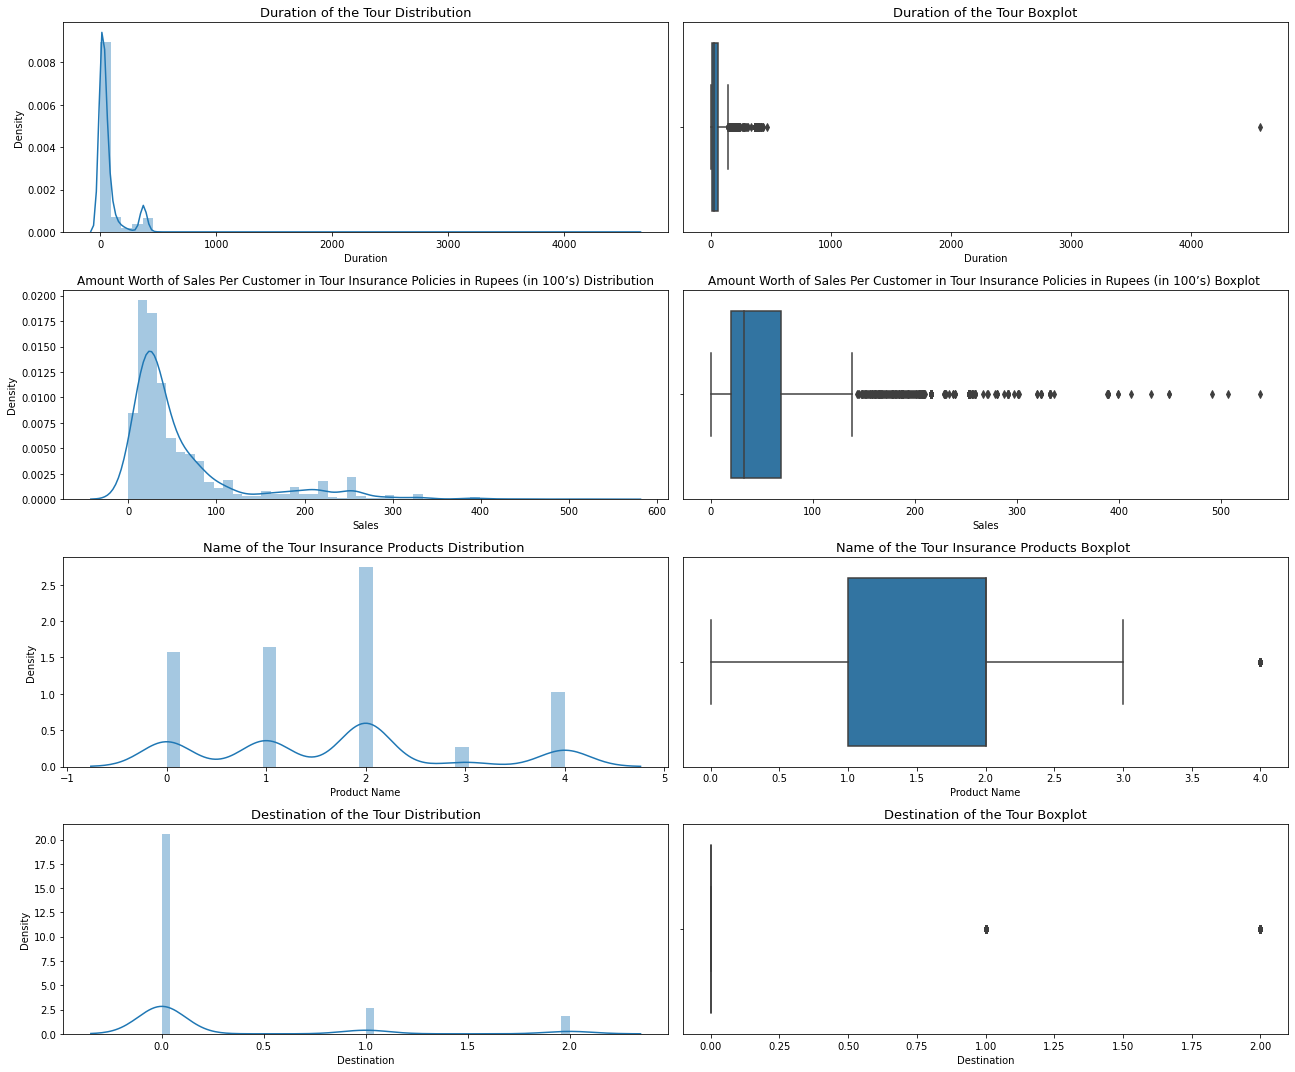

In [59]:
plt.figure(figsize =(18,15))

#Duration
plt.subplot(4,2,1)
e = sns.distplot(data_object['Duration'])
e.set_title('Duration of the Tour Distribution',fontsize = 13)

plt.subplot(4,2,2)
e = sns.boxplot(data_object['Duration'])
e.set_title('Duration of the Tour Boxplot',fontsize = 13)

#Sales
plt.subplot(4,2,3)
f = sns.distplot(data_object['Sales'])
f.set_title('Amount Worth of Sales Per Customer in Tour Insurance Policies in Rupees (in 100’s) Distribution', fontsize=12)

plt.subplot(4,2,4)
f = sns.boxplot(data_object['Sales']) 
f.set_title('Amount Worth of Sales Per Customer in Tour Insurance Policies in Rupees (in 100’s) Boxplot ', fontsize = 12)

#Product Name
plt.subplot(4,2,5)
g = sns.distplot(data_object['Product Name'])
g.set_title('Name of the Tour Insurance Products Distribution ', fontsize = 13)

plt.subplot(4,2,6)
g = sns.boxplot(data_object['Product Name'])
g.set_title('Name of the Tour Insurance Products Boxplot ', fontsize = 13)

#Destination
plt.subplot(4,2,7)
h = sns.distplot(data_object['Destination'])
h.set_title('Destination of the Tour Distribution' , fontsize = 13)

plt.subplot(4,2,8)
h = sns.boxplot(data_object['Destination'])
h.set_title('Destination of the Tour Boxplot' , fontsize = 13)


plt.tight_layout()
plt.show()

### Bivariate Analysis

In [60]:
corr1 = data_object.corr(method='pearson')
corr1.round(3)

,Age,Type,Commision,Channel,Duration,Sales,Product Name,Destination
Age,1.000,-0.049,0.068,-0.069,0.030,0.039,0.021,0.005
Type,-0.049,1.000,-0.217,-0.099,-0.198,-0.255,-0.008,0.317
Commision,0.068,-0.217,1.000,0.034,0.471,0.767,0.399,0.184
Channel,-0.069,-0.099,0.034,1.000,-0.019,0.037,-0.038,0.035
Duration,0.030,-0.198,0.471,-0.019,1.000,0.559,0.355,-0.020
Sales,0.039,-0.255,0.767,0.037,0.559,1.000,0.475,0.094
Product Name,0.021,-0.008,0.399,-0.038,0.355,0.475,1.000,0.022
Destination,0.005,0.317,0.184,0.035,-0.020,0.094,0.022,1.000


**Interpretations :**
- A Correlation Matrix was created above using the 'Pearson' method.
- For better understanding, a graphical representation in the form of heatmap was also created with respect to Correlation Matrix.

### Heatmap

- A __Triangular Heatmap__  was created for the correlation matrix.
- The elements on the diagonal are the parts where categories of the same type correlate.

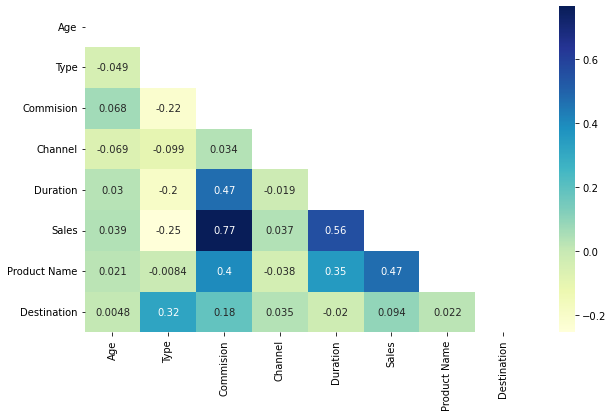

In [61]:
# creating mask
mask1 = np.triu(np.ones_like(data_object.corr()))
 
# plotting a triangle correlation heatmap for easy interpretation
plt.subplots(figsize=(10,6))
data_objectplot = sns.heatmap(data_object.corr(), cmap="YlGnBu", annot=True, mask=mask1)
 
# displaying heatmap YlGnBu
plt.show()

**Interpretations :**
- We inferred that there was 77% correlation between sales and commision. It means that as the Amount of Sales per customer for tour insurance policies increases, the Commission for Tour Insurance firms increases.
- Many of the features had very less value for correlation which indicates that the these features are does not relate to each other. In other words, they will not effect the performance of other features.
- Moving on towards the lowest correlation , 'Commission' and 'Type' had lowest correlation among each other. It meant that commission received for Tour Insurance Firm decrease as per the type of Tour Insurance Firm.
- Adding on, there is 56% correlation between 'Sales' & 'Duration'. It tells us that duration of the tour affects the amount of sales per customer for tour insurance policies in a positive way as they were directly proportional to each other.

### Multi-Variate Analysis

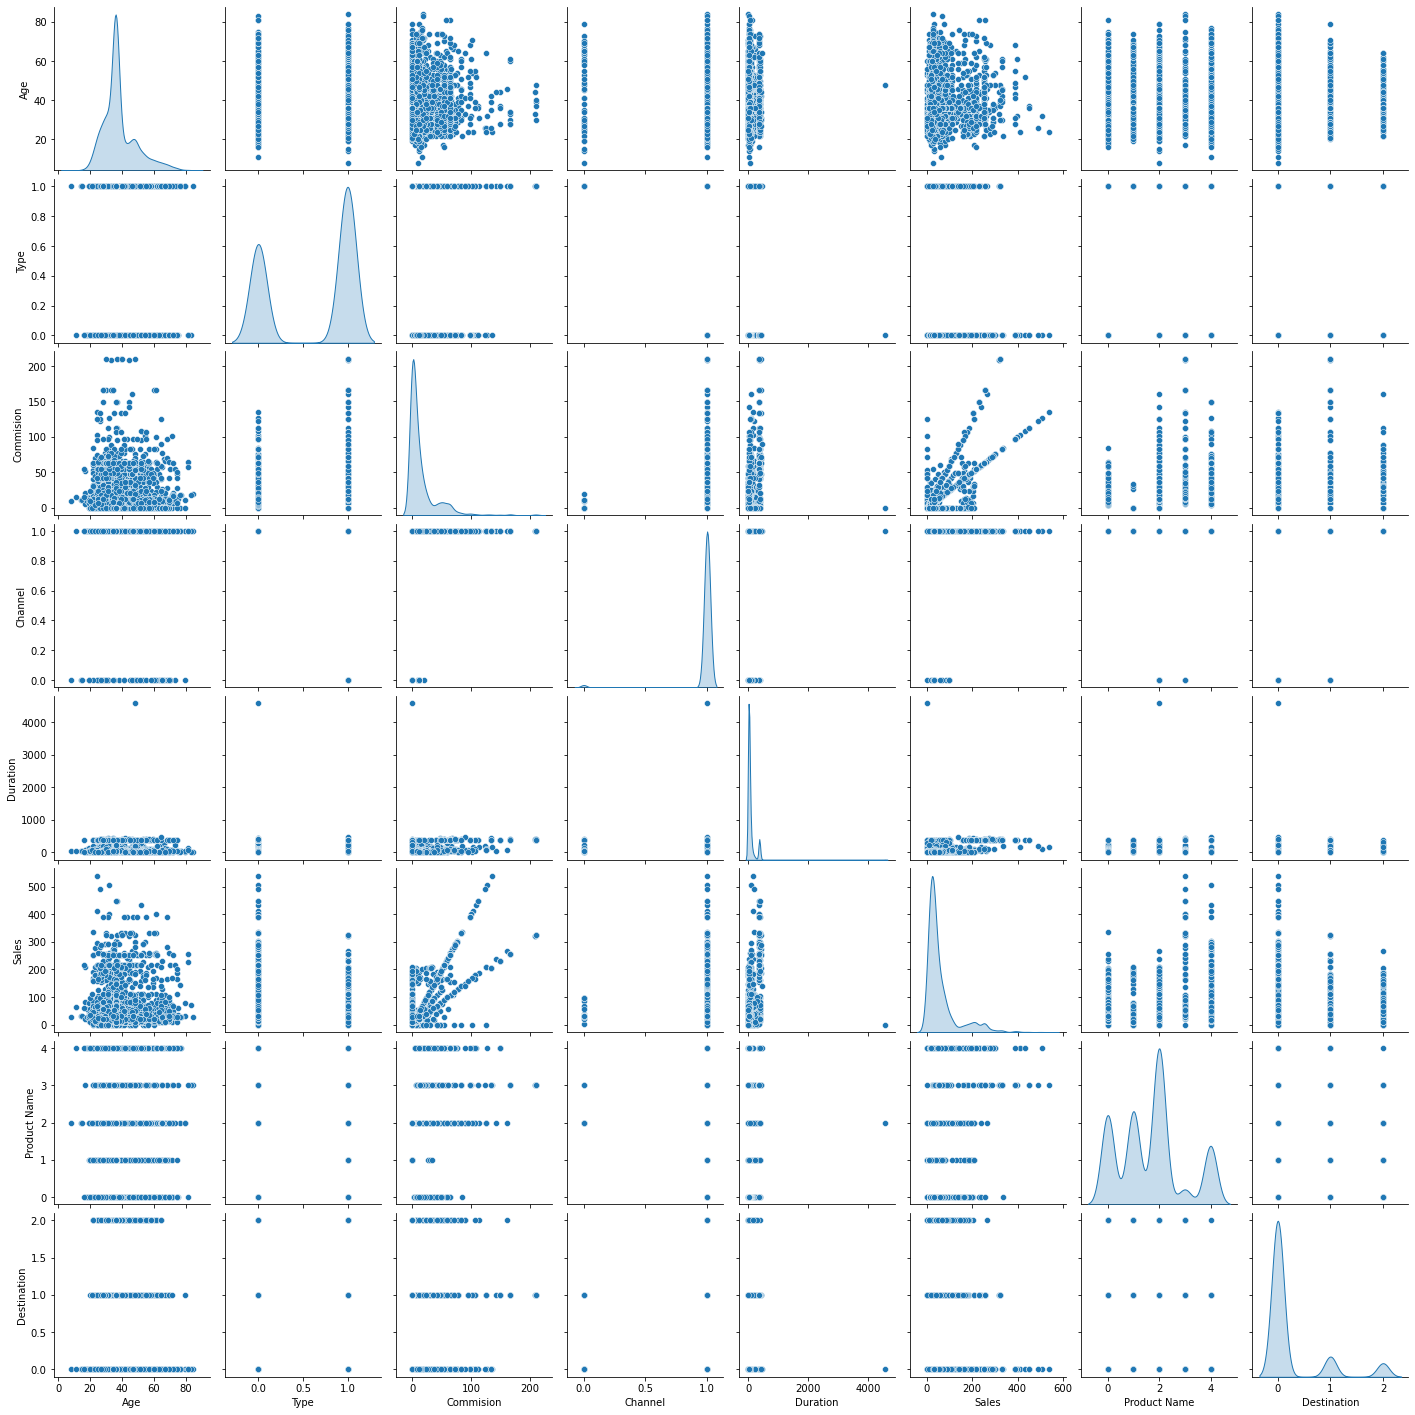

In [62]:
sns.pairplot(data_object,diag_kind='kde');

### Problem 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest

**Data Spilting into Train and Test (size = 0.30) & random_state = 1** 

**Random State :** <br>
Random state value is nothing but setting a seat value which is to ensure uniformity when we are the same random generation function across multiple systems. The integer value of random state must remain same if we are passing the same train test spilt function in a separate system so as to get the same set of observations/records. 

**Importance Of Random State**
- The important thing is that everytime you use any natural number, you will always get the same output the first time you make the model which is similar to random state while train test split.

In [63]:
# capture the target column ("outcome") into separate vectors for training set and test set

X = data_object.drop("Claimed" , axis=1)

y = data_object.Claimed

The test size was considered to be 30% for testing and 70% was considered for training as a standard for better modelling.

In [64]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

print(X_train.shape)
print(X_test.shape)
#1. Training for independent variabes
#2. Testing Independent Variables 
#3. Training Dependent Variables
#4. Testing Dependent Variables  

(2100, 8)
(900, 8)


In [65]:
data_object.Claimed.value_counts()

No     2076
Yes     924
Name: Claimed, dtype: int64

In [66]:
(924/2076)*100

44.50867052023121

In [67]:
data_object.Claimed.value_counts(1)

No     0.692
Yes    0.308
Name: Claimed, dtype: float64

In [68]:
train_labels.value_counts(1)

No     0.700476
Yes    0.299524
Name: Claimed, dtype: float64

In [69]:
test_labels.value_counts(1)

No     0.672222
Yes    0.327778
Name: Claimed, dtype: float64

Observations are almost equally distributed between the train and test sets wrt to target variable.

### Building classification model CART - Decision Tree.

In [70]:
from sklearn import tree

Using criterion = 'gini' and random_state = 1 for building the decision tree model.

In [71]:
dt_model = DecisionTreeClassifier(criterion = 'gini',random_state=1)

In [72]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

The Importance of features in the tree building ( The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance ).

[Text(196.57185834924724, 213.55714285714285, 'X[6] <= 2.5\ngini = 0.42\nsamples = 2100\nvalue = [1471, 629]'),
 Text(109.66428123068603, 205.79142857142858, 'X[2] <= 1.275\ngini = 0.334\nsamples = 1711\nvalue = [1348, 363]'),
 Text(35.866232424289244, 198.0257142857143, 'X[6] <= 1.5\ngini = 0.218\nsamples = 963\nvalue = [843, 120]'),
 Text(15.68728368355995, 190.26, 'X[4] <= 26.5\ngini = 0.094\nsamples = 467\nvalue = [444, 23]'),
 Text(8.276885043263288, 182.4942857142857, 'X[5] <= 23.5\ngini = 0.062\nsamples = 249\nvalue = [241, 8]'),
 Text(4.9661310259579725, 174.72857142857143, 'X[0] <= 44.5\ngini = 0.024\nsamples = 165\nvalue = [163, 2]'),
 Text(2.4830655129789863, 166.96285714285713, 'X[5] <= 16.5\ngini = 0.014\nsamples = 145\nvalue = [144, 1]'),
 Text(1.6553770086526576, 159.19714285714286, 'gini = 0.0\nsamples = 109\nvalue = [109, 0]'),
 Text(3.310754017305315, 159.19714285714286, 'X[5] <= 17.5\ngini = 0.054\nsamples = 36\nvalue = [35, 1]'),
 Text(2.4830655129789863, 151.431428

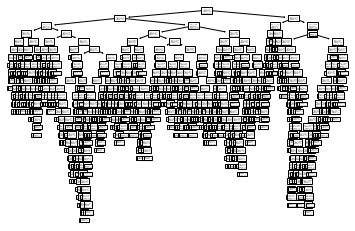

In [73]:
tree.plot_tree(dt_model)

In [74]:
dt_model.score(X_train,train_labels)

0.9947619047619047

In [75]:
dt_model.score(X_test,test_labels)

0.6888888888888889

By checking the score , it was clear that the model build was overfitted. So, we must regularize it using different parameters.

### Pruning/Regularization a decision tree

In [76]:
reg_dt_model = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth= 10)

In [77]:
reg_dt_model.fit(X_train,train_labels)

DecisionTreeClassifier(max_depth=10, random_state=1)

[Text(204.39807224025975, 207.55636363636364, 'X[6] <= 2.5\ngini = 0.42\nsamples = 2100\nvalue = [1471, 629]'),
 Text(114.84971590909092, 187.7890909090909, 'X[2] <= 1.275\ngini = 0.334\nsamples = 1711\nvalue = [1348, 363]'),
 Text(47.51152597402598, 168.0218181818182, 'X[6] <= 1.5\ngini = 0.218\nsamples = 963\nvalue = [843, 120]'),
 Text(25.091883116883118, 148.25454545454545, 'X[4] <= 26.5\ngini = 0.094\nsamples = 467\nvalue = [444, 23]'),
 Text(14.493506493506494, 128.48727272727274, 'X[5] <= 23.5\ngini = 0.062\nsamples = 249\nvalue = [241, 8]'),
 Text(8.696103896103896, 108.72, 'X[0] <= 44.5\ngini = 0.024\nsamples = 165\nvalue = [163, 2]'),
 Text(4.348051948051948, 88.95272727272729, 'X[5] <= 16.5\ngini = 0.014\nsamples = 145\nvalue = [144, 1]'),
 Text(2.898701298701299, 69.18545454545455, 'gini = 0.0\nsamples = 109\nvalue = [109, 0]'),
 Text(5.797402597402598, 69.18545454545455, 'X[5] <= 17.5\ngini = 0.054\nsamples = 36\nvalue = [35, 1]'),
 Text(4.348051948051948, 49.4181818181818

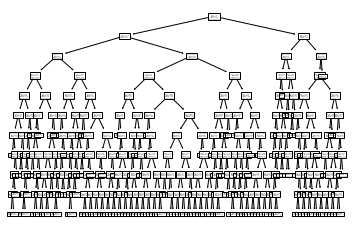

In [78]:
tree.plot_tree(reg_dt_model)

In [79]:
reg_dt_model.score(X_train,train_labels)

0.8752380952380953

In [80]:
reg_dt_model.score(X_test,test_labels)

0.74

**Interpretations :**
- Still after pruning , the score for regularized decision tree model was not good enough.
- Hence, we needed to do more precise pruning with more parameters in order to build a better regularized decision tree model.

**Pruning more by adding more functions for better understanding**

In [81]:
reg_dt_model1 = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth= 12,min_samples_split=140, min_samples_leaf=90)

In [82]:
reg_dt_model1.fit(X_train,train_labels)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=90, min_samples_split=140,
                       random_state=1)

[Text(226.37045454545455, 201.90857142857143, 'X[6] <= 2.5\ngini = 0.42\nsamples = 2100\nvalue = [1471, 629]'),
 Text(163.59545454545454, 170.84571428571428, 'X[2] <= 1.275\ngini = 0.334\nsamples = 1711\nvalue = [1348, 363]'),
 Text(98.91818181818182, 139.78285714285715, 'X[6] <= 1.5\ngini = 0.218\nsamples = 963\nvalue = [843, 120]'),
 Text(60.872727272727275, 108.72, 'X[4] <= 26.5\ngini = 0.094\nsamples = 467\nvalue = [444, 23]'),
 Text(30.436363636363637, 77.65714285714284, 'X[5] <= 21.5\ngini = 0.062\nsamples = 249\nvalue = [241, 8]'),
 Text(15.218181818181819, 46.59428571428572, 'gini = 0.025\nsamples = 159\nvalue = [157, 2]'),
 Text(45.654545454545456, 46.59428571428572, 'gini = 0.124\nsamples = 90\nvalue = [84, 6]'),
 Text(91.30909090909091, 77.65714285714284, 'X[5] <= 20.5\ngini = 0.128\nsamples = 218\nvalue = [203, 15]'),
 Text(76.0909090909091, 46.59428571428572, 'gini = 0.162\nsamples = 101\nvalue = [92, 9]'),
 Text(106.52727272727273, 46.59428571428572, 'gini = 0.097\nsample

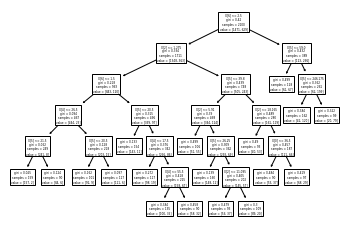

In [83]:
tree.plot_tree(reg_dt_model1)

**Interpretation :**
- By using multiple parameters such as max_depth, min_samples_split, min_samples_leaf, we were able to build a very good neat and clean regularized decision tree model.
- Now, the regularized/pruned decision tree looked simpler, and much more easy to understand.

In [84]:
reg_dt_model1.score(X_train,train_labels)

0.7766666666666666

In [85]:
reg_dt_model1.score(X_test,test_labels)

0.7611111111111111

**Interpretations :**
- Seeing the score, we concluded that this model is better pruned and regularized.

**Finding Best Decision Tree Model**
- Pruning helped us a lot in making the decision tree model but we also needed to find the best decision tree model. 
- For that, we needed the use GridSearch_CV function in order to achieve our goal.

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
params = {'criterion':['gini', 'entropy'],
         'max_depth':[2,4,6,8,10,12,14,16],
          'min_samples_split':[250,280,320],
         "min_samples_leaf":[ 140, 160,200]}
                                       
dtree = DecisionTreeClassifier(random_state=1)

In [88]:
dtree_model = tree.DecisionTreeClassifier(random_state=1) 

In [89]:
dtree_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [90]:
gs = GridSearchCV(dtree_model, param_grid = params, cv = 5, scoring = 'accuracy')

In [91]:
gs.fit(X_train,train_labels)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16],
                         'min_samples_leaf': [140, 160, 200],
                         'min_samples_split': [250, 280, 320]},
             scoring='accuracy')

In [92]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 140,
 'min_samples_split': 250}

In [93]:
best_dtree_model = gs.best_estimator_

In [94]:
best_dtree_model.score(X_train,train_labels)

0.7685714285714286

In [95]:
best_dtree_model.score(X_test,test_labels)

0.7533333333333333

In [96]:
test_labels

1957     No
2087    Yes
1394    Yes
1520    Yes
1098     No
       ... 
2363     No
270      No
517     Yes
2383     No
2201     No
Name: Claimed, Length: 900, dtype: object

#### Feature Importance For Decision Tree

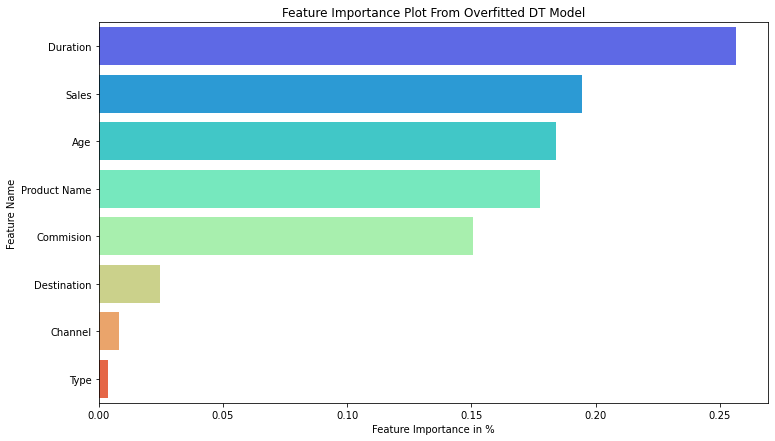

In [97]:
x=pd.DataFrame(dt_model.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot From Overfitted DT Model')
plt.show()

In [98]:
feat_imp = pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns)

In [99]:
print(feat_imp.sort_values(by=['Imp'],ascending=False))

                   Imp
Duration      0.256567
Sales         0.194531
Age           0.184053
Product Name  0.177561
Commision     0.150533
Destination   0.024848
Channel       0.008256
Type          0.003651


**Interpretations :**
- The Graphical Bar Plot depicted the feature importance for decision tree for dt_model which we build at the beginning which was overfitted.
- According to this bar plot, we interpretted that most important feature was 'Duration' at the top and just next to it was 'Sales' feature.
- We also observed that the least important feature among all was 'Type' and after that comes 'Channel' feature.

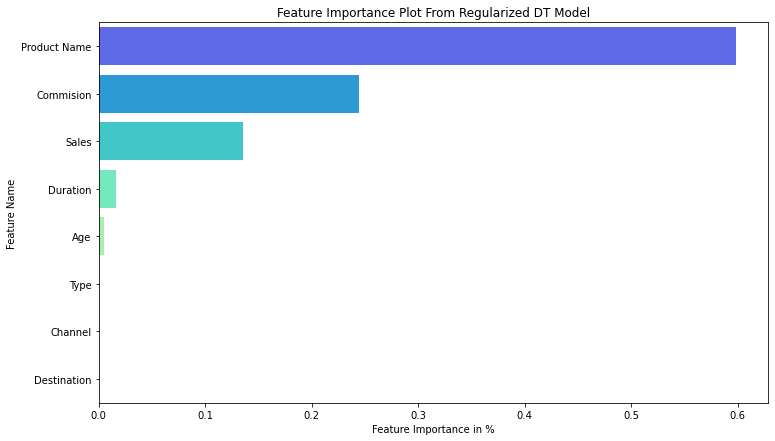

In [100]:
x=pd.DataFrame(reg_dt_model1.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot From Regularized DT Model')
plt.show()

In [101]:
feat_imp_reg = pd.DataFrame(reg_dt_model1.feature_importances_, columns = ["Imp"], index = X_train.columns)

In [102]:
print(feat_imp_reg.sort_values(by=['Imp'],ascending=False))

                   Imp
Product Name  0.598666
Commision     0.244894
Sales         0.135430
Duration      0.016364
Age           0.004646
Type          0.000000
Channel       0.000000
Destination   0.000000


**Interpretations :**
- The Graphical Bar Plot depicted the feature importance for regularized decision tree for reg_dt_model1 which we build using specific parameters for better understanding.
- We interpretted that most important feature was 'Product Name' at the top and just next to it was 'Commision' feature.
- We also observed that three features that are 'Type', 'Channel','Destination' were having 0 as value in feature importance funtion which means all three were the least important feature.

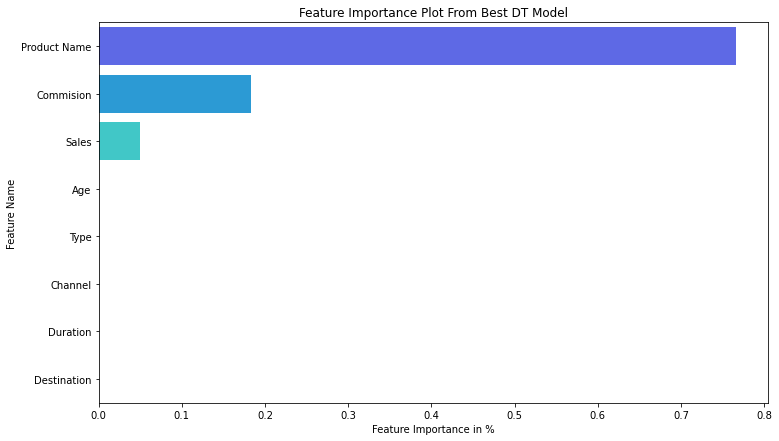

In [103]:
x=pd.DataFrame(best_dtree_model.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot From Best DT Model')
plt.show()

In [104]:
feat_imp_best = pd.DataFrame(best_dtree_model.feature_importances_, columns = ["Imp"], index = X_train.columns)

In [105]:
print(feat_imp_best.sort_values(by=['Imp'],ascending=False))

                   Imp
Product Name  0.766424
Commision     0.183527
Sales         0.050049
Age           0.000000
Type          0.000000
Channel       0.000000
Duration      0.000000
Destination   0.000000


**Interpretations :**
- The Grpahical Bar Plot showed the Feature Importance of Best Decision Tree for best_dtree_model which we build using GridSearch_CV function in order to get the best decision tree model.
- We interpretted that only 3 values are present in this Feature Importance of Best Decision Tree and rest of the features had 0 as value in the feature importance. It means that only 3 features that were 'Product Name' , 'Commision','Sales' were the only ones which were considered by the Feature Importance for Best Decision Tree.
- We also observed that except those 3, all others were considered to be least important in the feature importance for Best Decision Tree.

### Building classification model - Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
#Building a RandomForestCassifier wit n_estimators 100, max_samples 9, andfit it on the training data
rfcl = RandomForestClassifier(n_estimators = 100,criterion = 'gini',max_samples=.9,verbose = 0,random_state=1)
rfcl = rfcl.fit(X_train, train_labels)

In [108]:
rfcl

RandomForestClassifier(max_samples=0.9, random_state=1)

In [109]:
rfcl.score(X_train,train_labels)

0.9938095238095238

In [110]:
rfcl.score(X_test,test_labels)

0.7488888888888889

**Interpretations :**
- We inferred that, the random forest model is clear case of imbalance. Thus, we need to balance it.
- For that purpose, we used the GridSearch_CV function in order to get best model for Random Forest.

In [111]:
param_grid = {
    'max_depth': [5, 7],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [20, 50],
    'n_estimators': [301, 501]
}

rfcl1 = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl1, param_grid = param_grid, cv = 3)

In [112]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [20, 50],
                         'n_estimators': [301, 501]})

In [113]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 20,
 'n_estimators': 501}

In [114]:
best_grid = grid_search.best_estimator_

In [115]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [116]:
best_grid.score(X_train,train_labels)

0.789047619047619

In [117]:
best_grid.score(X_test,test_labels)

0.7466666666666667

**Interpretations :**
- Now, after using GridSearch_cv function, best_grid model of the random forest model had given very good score.

In [118]:
#Fitting the random forest model in order for further analysis
rfcl2 = rfcl1.fit(X_train, train_labels)

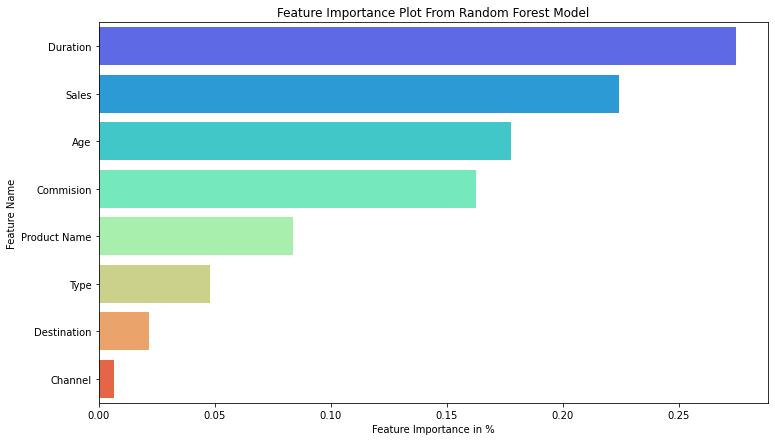

In [149]:
x=pd.DataFrame(rfcl.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot From Random Forest Model')
plt.show()

**Interpretation**
- Duration had the highest feature importance value as per the bar plot while Sales was just next to it.
- Channel had the lowest feature importance value.

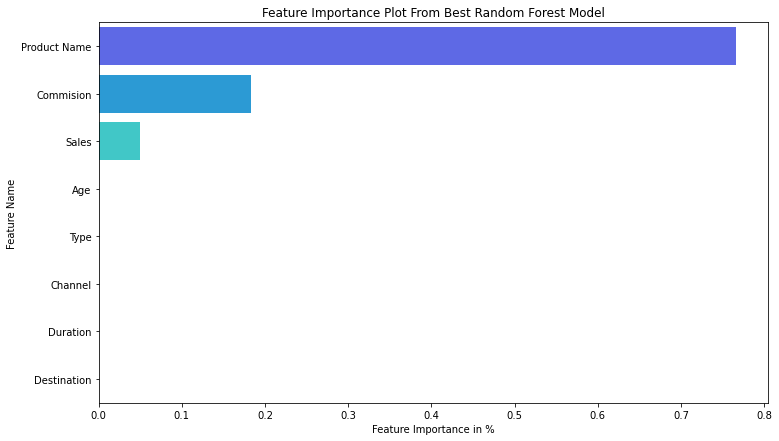

In [150]:
x=pd.DataFrame(best_grid.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot From Best Random Forest Model')
plt.show()

**Interpretations :**
- From the best random forest model(best_grid) we found that Product Name had the highest feature importance value.
- All variables had zero value except for Product Name, Commision, and Sales.

### Problem 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

##### Predicting Train and Test data with the RF Model

In [119]:
ytrain_predict = rfcl2.predict(X_train)
ytest_predict = rfcl2.predict(X_test)

**Train Accuracy**

In [120]:
rfcl2.score(X_train,train_labels)

0.9947619047619047

**Test Accuracy**

In [121]:
rfcl2.score(X_test,test_labels)

0.7522222222222222

As per the results, we could say that the train and test accuracy for random forest were not similar.

**Classificaion Report For Regularized Decision Tree**

In [122]:
y_train_predict = reg_dt_model1.predict(X_train)
y_test_predict = reg_dt_model1.predict(X_test)

from sklearn import metrics

print(reg_dt_model1.score(X_train,train_labels))
print(metrics.confusion_matrix(train_labels,y_train_predict))
print(metrics.classification_report(train_labels,y_train_predict))
print('-------------------------')
print('-------------------------')
print(reg_dt_model1.score(X_test,test_labels))
print(metrics.confusion_matrix(test_labels,y_test_predict))
print(metrics.classification_report(test_labels,y_test_predict))

0.7766666666666666
[[1257  214]
 [ 255  374]]
              precision    recall  f1-score   support

          No       0.83      0.85      0.84      1471
         Yes       0.64      0.59      0.61       629

    accuracy                           0.78      2100
   macro avg       0.73      0.72      0.73      2100
weighted avg       0.77      0.78      0.77      2100

-------------------------
-------------------------
0.7611111111111111
[[536  69]
 [146 149]]
              precision    recall  f1-score   support

          No       0.79      0.89      0.83       605
         Yes       0.68      0.51      0.58       295

    accuracy                           0.76       900
   macro avg       0.73      0.70      0.71       900
weighted avg       0.75      0.76      0.75       900



**Confusion Matrix for Training Data - Regularized Decision Tree**

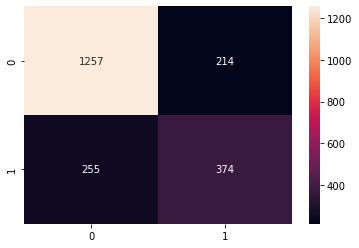

In [123]:
sns.heatmap(confusion_matrix(train_labels, y_train_predict),annot=True,fmt='.4g');

**Interpretations :**
- Visual Representation Of Confusion Matrix for Train Data for Decision Tree was shown here.
- 1257 were the people who did not claimed the insurance while 374 were the people who claimed the insurance.

**Confusion Matrix for Test Data - Regularized Decision Tree**

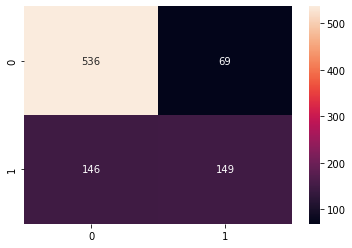

In [124]:
sns.heatmap(confusion_matrix(test_labels, y_test_predict),annot=True,fmt='.4g');

**Interpretations :**
- Visual Representation Of Confusion Matrix for Train Data for Decision Tree was shown here.
- 536 were the people who did not claimed the insurance while 149 were the people who claimed the insurance.

**Classification Report - Random Forest**

##### with rfcl

In [125]:
print(rfcl.score(X_train,train_labels))
print(metrics.confusion_matrix(train_labels,ytrain_predict))
print(metrics.classification_report(train_labels,ytrain_predict))
print('-------------------------')
print('-------------------------')
print(rfcl.score(X_test,test_labels))
print(metrics.confusion_matrix(test_labels,ytest_predict))
print(metrics.classification_report(test_labels,ytest_predict))

0.9938095238095238
[[1466    5]
 [   6  623]]
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1471
         Yes       0.99      0.99      0.99       629

    accuracy                           0.99      2100
   macro avg       0.99      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100

-------------------------
-------------------------
0.7488888888888889
[[543  62]
 [161 134]]
              precision    recall  f1-score   support

          No       0.77      0.90      0.83       605
         Yes       0.68      0.45      0.55       295

    accuracy                           0.75       900
   macro avg       0.73      0.68      0.69       900
weighted avg       0.74      0.75      0.74       900



##### with best_grid

In [126]:
print(best_grid.score(X_train,train_labels))
print(metrics.confusion_matrix(train_labels,ytrain_predict))
print(metrics.classification_report(train_labels,ytrain_predict))
print('-------------------------')
print('-------------------------')
print(best_grid.score(X_test,test_labels))
print(metrics.confusion_matrix(test_labels,ytest_predict))
print(metrics.classification_report(test_labels,ytest_predict))

0.789047619047619
[[1466    5]
 [   6  623]]
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1471
         Yes       0.99      0.99      0.99       629

    accuracy                           0.99      2100
   macro avg       0.99      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100

-------------------------
-------------------------
0.7466666666666667
[[543  62]
 [161 134]]
              precision    recall  f1-score   support

          No       0.77      0.90      0.83       605
         Yes       0.68      0.45      0.55       295

    accuracy                           0.75       900
   macro avg       0.73      0.68      0.69       900
weighted avg       0.74      0.75      0.74       900



**Confusion Matrix for Training Data - Random Forest**

##### Original rfcl

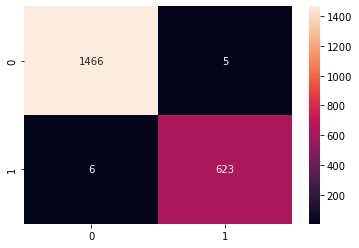

In [127]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True,fmt='.4g');

**Interpretations :**
- Visual Representation Of Confusion Matrix for Train Data for Random Forest was shown here.
- 1468 were the people who did not claimed the insurance while 619 were the people who claimed the insurance.

##### With best_grid

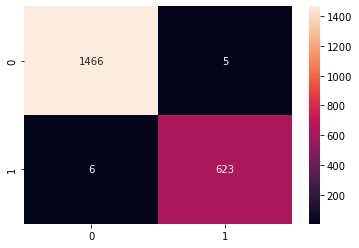

In [128]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True,fmt='.4g');

**Confusion Matrix for Test Data - Random Forest**

##### Original rfcl

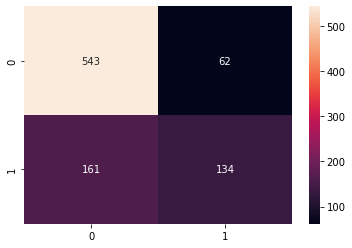

In [129]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict),annot=True,fmt='.4g');

**Interpretations :**
- Visual Representation Of Confusion Matrix for Test Data for Random Forest was shown here.
- 541 were the people who did not claimed the insurance while 133 were the people who claimed the insurance.

##### With best_grid

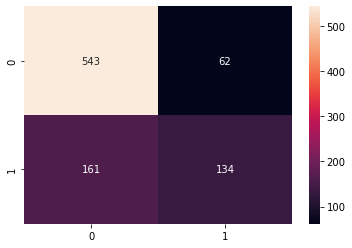

In [130]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict),annot=True,fmt='.4g');

In [131]:
print('Accuracy Score for regularized decision tree is',round(accuracy_score(test_labels, y_test_predict),2)*100,'%')

Accuracy Score for regularized decision tree is 76.0 %


### ROC_AUC Score & ROC Curve

In [132]:
from sklearn.metrics import roc_curve,roc_auc_score

#### ROC Curve - Regularized Decision Tree

In [133]:
dt_fpr, dt_tpr,_=roc_curve(test_labels,reg_dt_model1.predict_proba(X_test)[:,1],pos_label='Y')

AUC: 0.825


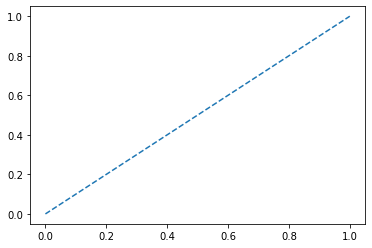

In [151]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model1.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC

cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)

# calculate roc curve

fpr, tpr, thresholds = roc_curve(train_labels, probs,pos_label='Y')
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

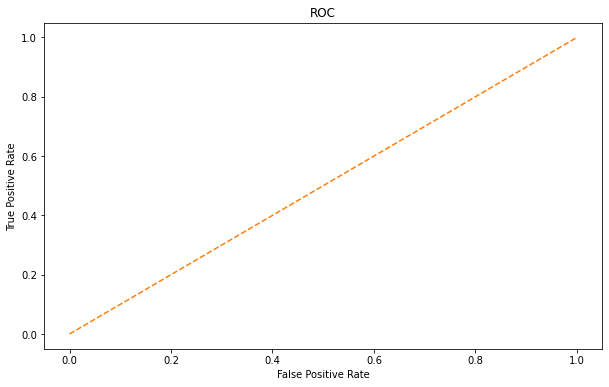

In [145]:
plt.figure(figsize=(10,6))
plt.plot(dt_fpr,dt_tpr, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()


#### ROC Curve - Random Forest

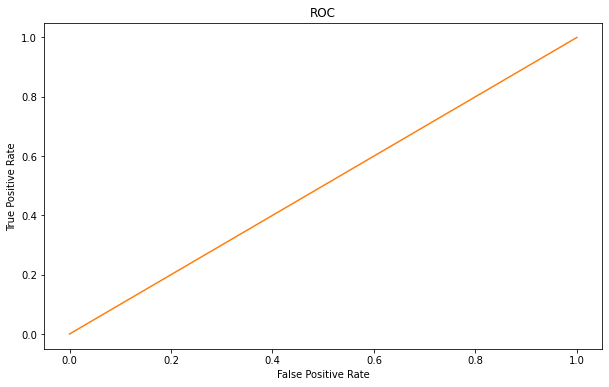

Area under Curve is 0.999907593441404


In [136]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,rfcl2.predict_proba(X_train)[:,1],pos_label='Y')
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,rfcl2.predict_proba(X_train)[:,1]))

AUC: 0.825


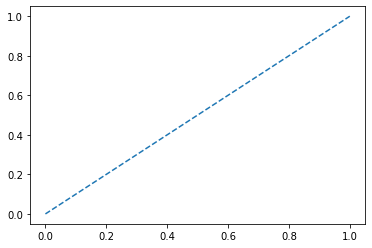

In [146]:
# predict probabilities
probs = reg_dt_model1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs,pos_label='Y')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Model Comparision

#### Comparing Accuracies from all the models for Train and Test Sets for Regularized Decision Tree

In [138]:
best_grid = gs.best_estimator_

In [139]:
models=[reg_dt_model1,best_grid]
models_names={reg_dt_model1:'DecisionTreeClassifier',best_grid:'RandomForestClassifier'}
for i in range(0, len(models)):
        print('Accuracy Score for Train set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(train_labels, models[i].predict(X_train)),2)))
        print('Accuracy Score for Test set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(test_labels, models[i].predict(X_test)),2))  )      

Accuracy Score for Train set for DecisionTreeClassifier is 0.78
Accuracy Score for Test set for DecisionTreeClassifier is 0.76
Accuracy Score for Train set for RandomForestClassifier is 0.77
Accuracy Score for Test set for RandomForestClassifier is 0.75


#### Comparing Confusion Matrices from All the models for the Train Set.

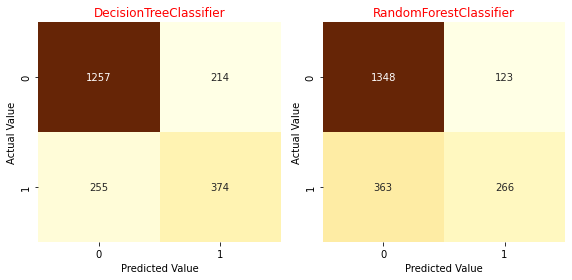

In [140]:
models=[reg_dt_model1,best_grid]
models_names={reg_dt_model1:'DecisionTreeClassifier',best_grid:'RandomForestClassifier'}
fig=plt.figure(figsize=(12,4))
for i in range(0, len(models)):
    ax=fig.add_subplot(1,3,i+1)
    sns.heatmap(confusion_matrix(train_labels, models[i].predict(X_train)),annot=True, fmt='.0f',cbar=False,cmap='YlOrBr')
    ax.set_title(models_names[models[i]],color='Red')
    plt.ylabel('Actual Value')
    plt.xlabel('Predicted Value')
        
    #plt.title('Confusion Matrix for Predictions on Train set')
plt.tight_layout()

#### Comparing Confusion Matrices from All the models for the Test Set.

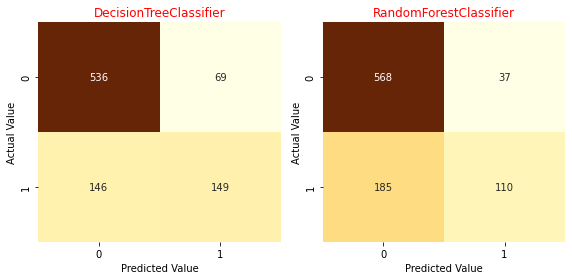

In [141]:
models=[reg_dt_model1,best_grid]
models_names={reg_dt_model1:'DecisionTreeClassifier',best_grid:'RandomForestClassifier'}
fig=plt.figure(figsize=(12,4))
for i in range(0, len(models)):
    ax=fig.add_subplot(1,3,i+1)
    sns.heatmap(confusion_matrix(test_labels, models[i].predict(X_test)),annot=True, fmt='.0f',cbar=False,cmap='YlOrBr')
    ax.set_title(models_names[models[i]],color='Red')
    plt.ylabel('Actual Value')
    plt.xlabel('Predicted Value')
        
    #plt.title('Confusion Matrix for Predictions on Train set')
plt.tight_layout()

In [152]:
print("Decision Tree - CART")
print(dt_model.score(X_train,train_labels))
print(dt_model.score(X_test,test_labels))
print("Decision Tree - CART using Grid Search CV")
print(reg_dt_model1.score(X_train,train_labels))
print(reg_dt_model1.score(X_test,test_labels))
print("Random Forest")
print(rfcl.score(X_train,train_labels))
print(rfcl.score(X_test,test_labels))
print("Random forest using Grid Search CV")
print(best_grid.score(X_train,train_labels))
print(best_grid.score(X_test,test_labels))

Decision Tree - CART
0.9947619047619047
0.6888888888888889
Decision Tree - CART using Grid Search CV
0.7766666666666666
0.7611111111111111
Random Forest
0.9938095238095238
0.7488888888888889
Random forest using Grid Search CV
0.7685714285714286
0.7533333333333333
